In [1]:
import pandas as pd
import scipy.optimize as opt
import numpy as np
import errors as err
import matplotlib.pyplot as plt

In [2]:
# read file with population data into dataframe          
df_pop = pd.read_csv("AuPopulation.csv")
print(df_pop)

    Year  Population  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   1960     7086299         NaN         NaN         NaN         NaN   
1   1961     7129864         NaN         NaN         NaN         NaN   
2   1962     7175811         NaN         NaN         NaN         NaN   
3   1963     7223801         NaN         NaN         NaN         NaN   
4   1964     7270889         NaN         NaN         NaN         NaN   
..   ...         ...         ...         ...         ...         ...   
57  2017     8840521         NaN         NaN         NaN         NaN   
58  2018     8879920         NaN         NaN         NaN         NaN   
59  2019     8916864         NaN         NaN         NaN         NaN   
60  2020     8955797         NaN         NaN         NaN         NaN   
61  2021     9042528         NaN         NaN         NaN         NaN   

    Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 53  \
0          NaN         NaN         NaN         NaN  ...        

In [3]:
def exp_growth(t, scale, growth):
    """ Computes exponential function with scale and growth as free parameters
    """
    
    f = scale * np.exp(growth * t)
    
    return f

Fit parameter [-0.03467202 -0.57837915]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


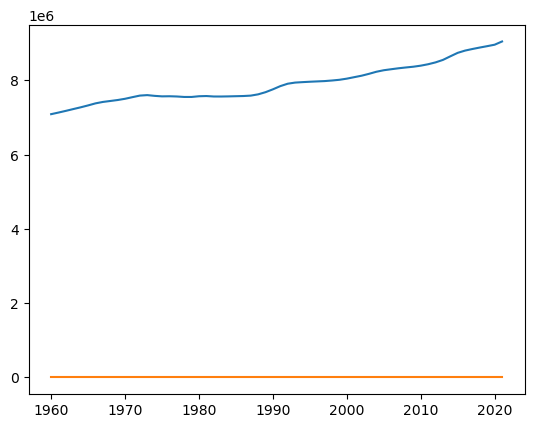

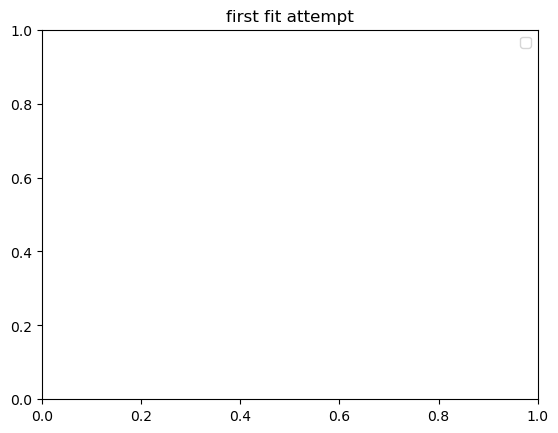

In [32]:
popt, pcorr = opt.curve_fit(exp_growth, df_pop["Year"], df_pop["Population"], method='trf', maxfev=10000)
#popt, pcorr = opt.curve_fit(exp_growth, df_pop["Year"], df_pop["Population"])
print("Fit parameter", popt)
df_pop["pop_exp"] = exp_growth(df_pop["Year"], *popt)
plt.plot(df_pop["Year"], df_pop["Population"], label="data")
plt.plot(df_pop["Year"], df_pop["pop_exp"], label="fit")

plt.figure()
plt.legend()
plt.title("first fit attempt")
plt.show()
print()

In [17]:
def exp_growth(t, scale, growth):
    """ Computes exponential function with scale and growth as free parameters
    """
    
    f = scale * np.exp(growth * (t-1960)) 

    return f

Fit parameter [-0.55604895 -0.59778552]


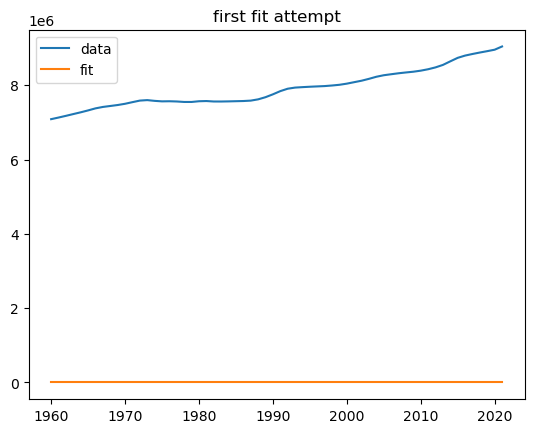

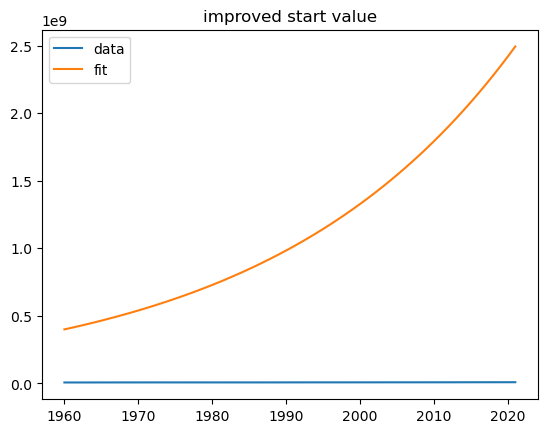

In [18]:
popt = [4e8, 0.03]
df_pop["pop_exp"] = exp_growth(df_pop["Year"], *popt)
plt.figure()
plt.plot(df_pop["Year"], df_pop["Population"], label="data")
plt.plot(df_pop["Year"], df_pop["pop_exp"], label="fit")
plt.legend()
plt.title("improved start value")
plt.show()


Fit parameter [7.09872750e+06 3.49281967e-03]


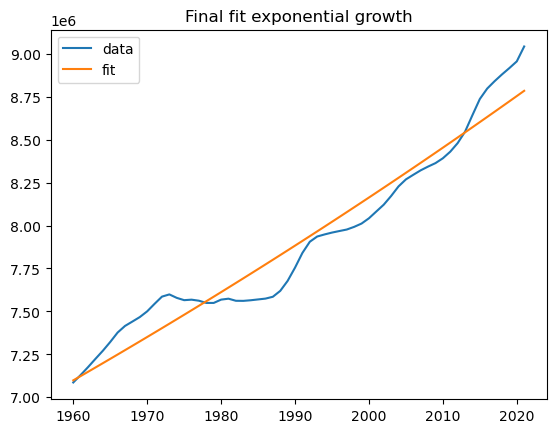


Population in
2030: 9.064928159235508 Mill.
2040: 9.387144208212701 Mill.
2050: 9.720813539598172 Mill.


In [19]:
# fit exponential growth
popt, pcorr = opt.curve_fit(exp_growth, df_pop["Year"], df_pop["Population"],
                            p0=[4e8, 0.03])
# much better
print("Fit parameter", popt)

df_pop["pop_exp"] = exp_growth(df_pop["Year"], *popt)
plt.figure()
plt.plot(df_pop["Year"], df_pop["Population"], label="data")
plt.plot(df_pop["Year"], df_pop["pop_exp"], label="fit")

plt.legend()
plt.title("Final fit exponential growth")
plt.show()
print()

print("Population in")
print("2030:", exp_growth(2030, *popt) / 1.0e6, "Mill.")
print("2040:", exp_growth(2040, *popt) / 1.0e6, "Mill.")
print("2050:", exp_growth(2050, *popt) / 1.0e6, "Mill.")


In [20]:
def logistics(t, a, k, t0):
    """ Computes logistics function with scale and incr as free parameters
    """
    
    f = a / (1.0 + np.exp(-k * (t - t0)))
    
    return f

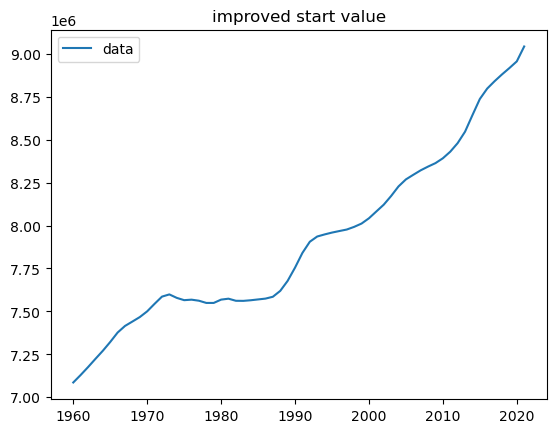

In [22]:
plt.figure()
plt.plot(df_pop["Year"], df_pop["Population"], label="data")
plt.legend()
plt.title("improved start value")
plt.show()


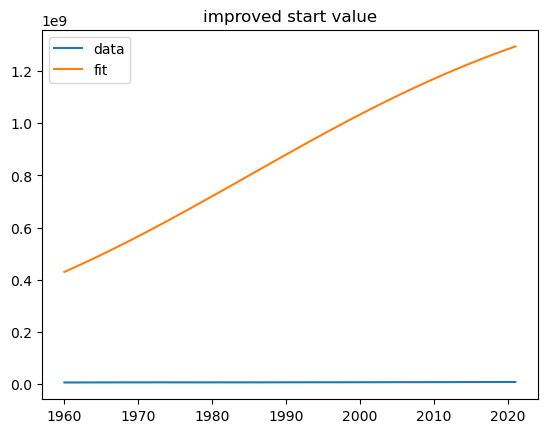

In [23]:
popt = [16e8, 0.04, 1985]
df_pop["pop_exp"] = logistics(df_pop["Year"], *popt)
plt.figure()
plt.plot(df_pop["Year"], df_pop["Population"], label="data")
plt.plot(df_pop["Year"], df_pop["pop_exp"], label="fit")
plt.legend()
plt.title("improved start value")
plt.show()

Fit parameter [1.12091073e+11 3.49306415e-03 4.72750957e+03]


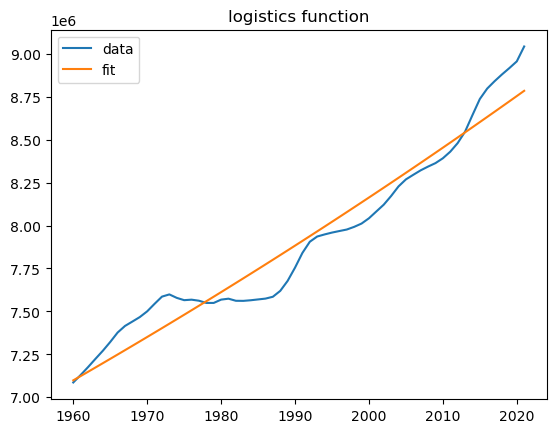

Population in
2030: 9.064920798376194 Mill.
2040: 9.387132549950786 Mill.
2050: 9.720796294420609 Mill.


In [26]:
popt, pcorr = opt.curve_fit(logistics, df_pop["Year"], df_pop["Population"],p0=(16e8, 0.04, 1960.0), method='trf', maxfev=10000)
print("Fit parameter", popt)
      
df_pop["pop_logistics"] = logistics(df_pop["Year"], *popt)

plt.figure()
plt.title("logistics function")
plt.plot(df_pop["Year"], df_pop["Population"], label="data")
plt.plot(df_pop["Year"], df_pop["pop_logistics"], label="fit")
plt.legend()
plt.show()

print("Population in")
print("2030:", logistics(2030, *popt) / 1.0e6, "Mill.")
print("2040:", logistics(2040, *popt) / 1.0e6, "Mill.")
print("2050:", logistics(2050, *popt) / 1.0e6, "Mill.")


Fit parameter [1.20865456e+11 3.49304678e-03 4.74910129e+03]


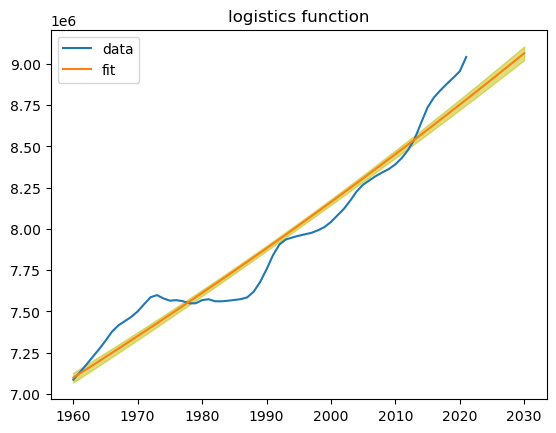

In [30]:
popt, pcovar = opt.curve_fit(logistics, df_pop["Year"], df_pop["Population"], p0=(16e8, 0.04, 1985.0), method='trf', maxfev=10000)
print("Fit parameter", popt)



# call function to calculate upper and lower limits with extrapolation
# create extended year range
years = np.linspace(1960, 2030)
pop_logistics = logistics(years, *popt)

sigma = err.error_prop(years, logistics, popt, pcovar)
low = pop_logistics - sigma
up = pop_logistics + sigma


plt.figure()
plt.title("logistics function")
plt.plot(df_pop["Year"], df_pop["Population"], label="data")
plt.plot(years, pop_logistics, label="fit")
# plot error ranges with transparency
plt.fill_between(years, low, up, alpha=0.5, color="y")

plt.legend(loc="upper left")
plt.show()


In [31]:
pop_2030 = logistics(2030, *popt)

sigma = err.error_prop(2030, logistics, popt, pcovar)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAiwAAAGxCAYAAABBZ+3pAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAACWq0lEQVR4nOzdd3iUZb7/8ff0zKRM6swkEAKhSui9K4p0V10VBAuIbc+6+7PsetQ96i66Lnosq+561nUXRWQpKqJiF6WIRnrvoSSUJDOTNkmmzzy/PwaCkZZAer6v68qlM7mf57nvAMknd1UpiqIghBBCCNGEqRu7AkIIIYQQFyKBRQghhBBNngQWIYQQQjR5EliEEEII0eRJYBFCCCFEkyeBRQghhBBNngQWIYQQQjR5EliEEEII0eRJYBFCCCFEkyeBRYgmZt68eahUKo4cOVKvz1GpVPzpT3+q1TWfffbZOa9p3749M2fOvOR61dSRI0eYNGkSiYmJqFQqHnjggQZ79s+53W7+9Kc/sWrVqjM+11B/nkK0dNrGroAQonFkZ2fTtm3bWl3z2Wef8dprr501tCxbtoy4uLg6qt2FPfjgg6xbt44333wTm81Gampqgz3759xuN7NnzwbgiiuuqPa5SZMmkZ2d3aj1E6IlkMAiRCs1ZMiQOr1f37596/R+F7Jz504GDRrEdddd16DPra2UlBRSUlIauxpCNHsyJCREM/Hmm2/Su3dvoqKiSExM5Prrr2fPnj1nlPvXv/5Fly5dMBgMdO/enYULFzJz5kzat29frdzPh4Tcbje///3v6dChQ9UzBgwYwKJFiwCYOXMmr732WtW1pz5ODXWcbUiotLSU3/3ud2RmZmIwGLBYLEycOJG9e/dWlfnHP/5B7969iYmJITY2lm7duvGHP/zhnF+HVatWoVKpyMnJ4fPPP69Wj3MNv5y65qdDNldccQU9evRgw4YNjBw5EpPJRGZmJs8++yzhcLjG7Thy5EhVIJk9e3ZVfU59Lc5Vp5r8ec6cOZOYmBhycnKYOHEiMTExpKen87vf/Q6fz3fOr5EQLZH0sAjRDMyZM4c//OEPTJs2jTlz5lBUVMSf/vQnhg4dyoYNG+jcuTMAb7zxBvfeey833HADf/3rXykrK2P27Nk1+uH20EMP8c477/DnP/+Zvn37UllZyc6dOykqKgLgiSeeoLKykvfff5/s7Oyq68411FFeXs6IESM4cuQIjzzyCIMHD6aiooI1a9aQn59Pt27dWLx4Mb/+9a/57W9/ywsvvIBarSYnJ4fdu3efs579+vUjOzub66+/no4dO/LCCy+ctx7nU1BQwC233MLvfvc7/vjHP7Js2TIee+wx0tLSuP3222vUjmHDhvHFF18wfvx47rzzTu666y6A8/aq1PTPEyAQCPCLX/yCO++8k9/97nesWbOGp59+GrPZzJNPPlnrNgvRbClCiCblrbfeUgDl8OHDiqIoSklJiWI0GpWJEydWK5eXl6cYDAZl+vTpiqIoSigUUmw2mzJ48OBq5XJzcxWdTqdkZGRUex9Q/vjHP1a97tGjh3Ldddedt2733Xefcq5vGxkZGcqMGTOqXj/11FMKoHz99dfnvN9vfvMbJT4+/rzPPJeMjAxl0qRJ1d77+dfulJUrVyqAsnLlyqr3Lr/8cgVQ1q1bV61s9+7dlXHjxtWqHQ6H44yv57nqVNM/T0VRlBkzZiiA8u6771YrO3HiRKVr167nrI8QLVGLGxJas2YN11xzDWlpaahUKj788MNa30NRFF544YWqbvX09HT+8pe/1H1lhaiB7OxsPB7PGcMt6enpXHnllXzzzTcA7Nu3j4KCAqZMmVKtXLt27Rg+fPgFnzNo0CA+//xzHn30UVatWoXH47mken/++ed06dKFMWPGnPeZpaWlTJs2jY8++gin03lJz6wtm83GoEGDqr3Xq1cvcnNzq17XpB21UdM/z1NUKhXXXHPNeesoRGvQ4gJLZWUlvXv35u9///tF3+P+++/n3//+Ny+88AJ79+5l+fLlZ3xTE6KhnBqSOduQR1paWtXnT/3XarWeUe5s7/3cq6++yiOPPMKHH37I6NGjSUxM5LrrruPAgQMXVW+Hw3HBVUi33XYbb775Jrm5udxwww1YLBYGDx7M119/fVHPrK2kpKQz3jMYDNXCWk3aURs1/fM8xWQyERUVdUYdvV5vndVJiOagxQWWCRMm8Oc//5lf/vKXZ/283+/nv//7v2nTpg3R0dEMHjy42kS8PXv28I9//IOPPvqIX/ziF3To0IE+ffrU2W9XQtTWqR+q+fn5Z3zuxIkTJCcnVytXWFh4RrmCgoILPic6OprZs2ezd+9eCgoK+Mc//sGPP/54xm/3NZWSksKxY8cuWO6OO+7ghx9+oKysjE8//RRFUZg8efJF9SCc+sH+8zk7l9JzU9N21FRN/zyFENW1uMByIXfccQfff/89ixcvZvv27dx0002MHz++6rfI5cuXk5mZySeffEKHDh1o3749d911F8XFxY1cc9FaDR06FKPRyIIFC6q9f+zYMb799luuuuoqALp27YrNZuPdd9+tVi4vL48ffvihVs+0Wq3MnDmTadOmsW/fPtxuNxD5zR6o0XDRhAkT2L9/P99++22NnhkdHc2ECRP4n//5H/x+P7t27apVnYGqlVDbt2+v9v7HH39c63udUpN21ObrUtM/TyFEda1qldDBgwdZtGgRx44dIy0tDYDf//73fPHFF7z11lv85S9/4dChQ+Tm5vLee+8xf/58QqEQDz74IDfeeGONv/EKUZfi4+N54okn+MMf/sDtt9/OtGnTKCoqYvbs2URFRfHHP/4RALVazezZs7n33nu58cYbmTVrFqWlpcyePZvU1FTU6vP/fjJ48GAmT55Mr169SEhIYM+ePbzzzjsMHToUk8kEQM+ePQF47rnnmDBhAhqNhl69eqHX68+43wMPPMCSJUu49tprefTRRxk0aBAej4fVq1czefJkRo8ezd13343RaGT48OGkpqZSUFDAnDlzMJvNDBw4sNZfq4EDB9K1a1d+//vfEwwGSUhIYNmyZaxdu7bW96pNO2JjY8nIyOCjjz7iqquuIjExkeTk5DOWkkPN/zyFED/T2LN+6xOgLFu2rOr1u+++qwBKdHR0tQ+tVqtMmTJFURRFufvuuxVA2bdvX9V1mzZtUgBl7969Dd0E0Qqda6XLv//9b6VXr16KXq9XzGazcu211yq7du064/o33nhD6dSpk6LX65UuXboob775pnLttdcqffv2rVaOn61qefTRR5UBAwYoCQkJisFgUDIzM5UHH3xQcTqdVWV8Pp9y1113KSkpKYpKpapWz5+vElKUyIqY+++/X2nXrp2i0+kUi8WiTJo0qerf0ttvv62MHj1asVqtil6vV9LS0pQpU6Yo27dvv+DX6WyrhBRFUfbv36+MHTtWiYuLU1JSUpTf/va3yqeffnrWVUJZWVlnXD9jxowzVlRdqB2KoigrVqxQ+vbtqxgMBgWo+lpcyp/njBkzlOjo6DPq+Mc//vGcq7WEaKlUiqIojZSV6p1KpWLZsmVVO2EuWbKEW265hV27dqHRaKqVjYmJwWaz8cc//pG//OUvBAKBqs95PB5MJhNfffUVV199dUM2QYhLVlpaSpcuXbjuuut44403Grs6QghxUVrVkFDfvn0JhULY7XZGjhx51jLDhw8nGAxy8OBBOnbsCMD+/fsByMjIaLC6CnExCgoKeOaZZxg9ejRJSUnk5uby17/+lfLycu6///7Grp4QQly0FtfDUlFRQU5ODhAJKC+99FLVEs127dpx66238v333/Piiy/St29fnE4n3377LT179mTixImEw2EGDhxITEwML7/8MuFwmPvuu4+4uDi++uqrRm6dEOdXUlLC7bffzoYNGyguLsZkMjFkyBBmz57N4MGDG7t6Qghx0VpcYFm1ahWjR48+4/0ZM2Ywb948AoEAf/7zn5k/fz7Hjx8nKSmJoUOHMnv27KoJhSdOnOC3v/0tX331VdXKhRdffJHExMSGbo4QQgghaIGBRQghhBAtT6vbh0UIIYQQzY8EFiGEEEI0eS1mlVA4HObEiRPExsaiUqkauzpCCCGEqAFFUSgvLyctLe28G1y2mMBy4sQJ0tPTG7saQgghhLgIR48ePe9Boy0msMTGxgKRBsfFxTVybYQQQghREy6Xi/T09Kqf4+fSYgLLqWGguLg4CSxCCCFEM3Oh6Rwy6VYIIYQQTZ4EFiGEEEI0eRJYhBBCCNHktZg5LDURCoWqncIsak6n051xwrUQQgjRUFpNYKmoqODYsWPISQQXR6VS0bZtW2JiYhq7KkIIIVqhVhFYQqEQx44dw2QykZKSIhvL1ZKiKDgcDo4dO0bnzp2lp0UIIUSDaxWBJRAIoCgKKSkpGI3Gxq5Os5SSksKRI0cIBAISWIQQQjS4VjXpVnpWLp587YQQQjSmVhVYhBBCCNE8SWARQgghRJMngaUZuuKKK3jggQcauxpCCCFEg5HA0sKtWrUKlUpFaWlpY1dFCCGEuGgSWIQQQgjR5LXKwKIoCm5/sFE+artxXWVlJbfffjsxMTGkpqby4osvVvv8ggULGDBgALGxsdhsNqZPn47dbgfgyJEjjB49GoCEhARUKhUzZ84E4IsvvmDEiBHEx8eTlJTE5MmTOXjw4KV/cYUQQrQ4oVAlTudy/H5no9WhVezD8nOeQIjuT37ZKM/e/dQ4TPqaf9kffvhhVq5cybJly7DZbPzhD39g06ZN9OnTBwC/38/TTz9N165dsdvtPPjgg8ycOZPPPvuM9PR0li5dyg033MC+ffuIi4ur2oemsrKShx56iJ49e1JZWcmTTz7J9ddfz9atW1GrW2WOFUIIcRZ+v538/Lm43fswGNLR65MbpR6tMrA0FxUVFcydO5f58+dz9dVXA/D222/Ttm3bqjKzZs2q+v/MzExeffVVBg0aREVFBTExMSQmJgJgsViIj4+vKnvDDTdUe9bcuXOxWCzs3r2bHj161GOrhBBCNBdu9wHy8/+N270flapxNw1tlYHFqNOw+6lxjfbsmjp48CB+v5+hQ4dWvZeYmEjXrl2rXm/ZsoU//elPbN26leLiYsLhMAB5eXl07979vPd+4okn+PHHH3E6ndWuk8AihBCtm6IouFw/UlAwn0DAicnUHY9nX6PWqVUGFpVKVathmcZyofkulZWVjB07lrFjx7JgwQJSUlLIy8tj3Lhx+P3+8157zTXXkJ6ezr/+9S/S0tIIh8P06NHjgtcJIYRo2RQlhNP5CQ7H+4AKk6k70PgHB8tkhSasU6dO6HQ6fvzxx6r3SkpK2L9/PwB79+7F6XTy7LPPMnLkSLp161Y14fYUvV4PRA6APKWoqIg9e/bw+OOPc9VVV3HZZZdRUlLSAC0SQgjRlIVCbvLz36KwcAEaTTRGY2bV0Syqn/wcaQxNv5uhFYuJieHOO+/k4YcfJikpCavVyv/8z/9UTYpt164der2ev/3tb/zqV79i586dPP3009XukZGRgUql4pNPPmHixIkYjUYSEhJISkrijTfeIDU1lby8PB599NHGaKIQQogmwu93kJ//JuXl6zAYMtBqzZFPKAoJW34gLXc3gbbuRquf9LA0cc8//zyjRo3iF7/4BWPGjGHEiBH0798fiJygPG/ePN577z26d+/Os88+ywsvvFDt+jZt2jB79mweffRRrFYrv/nNb1Cr1SxevJhNmzbRo0cPHnzwQZ5//vnGaJ4QQogmwO3O4ejRF3C5fsRo7FIVVlR+H9ZvPyJhxwaiXJVoD6xptDqqlNpuDNJEuVwuzGYzZWVlxMXFVfuc1+vl8OHDdOjQgaioqEaqYfMmX0MhhGh5FEWhvHw9BQVv4/c7MJm6olJFBl90ZcVYvv0YvauEsFrD8f6XET/qNWJj+9RpHc738/unZEhICCGEuEiHHBXEm/QkRusbuyq1Fplc++nJybUKJlP3qvkqxmOHsaz5DHXAT9AUQ8EVkykzFRHfiPWVwCKEEEJcpCc/2sXG3GJemtKHiT1TG7s6NRYKuSksXEhx8ZfodIno9SfrriiYd24gYfP3qACvJY3CKyYTijKCu6hR6yyBRQghhLgIu06UsTbHiVoFPduYG7s6NRaZXDsXl2sdUVHtT89XCQRI/uErYo5EVqK6uvSkaNBo0GhACTdmlQEJLEIIIcRFmfvdYQAm9EwlPdHUyLWpmZ/uXGsydUWtjsxJ1FaUYfl2OYYSB4pKTdHg0ZR37dXIta1OAosQQghRSwVlXj7edgKAe0ZmNnJtLiyyc202BQXvEAg4iY7OqppcG5V/FMvqT9D4vISiTBReMRmftU0j1/hMtV7WXF5ezgMPPEBGRgZGo5Fhw4axYcOG816zevVq+vfvT1RUFJmZmbz++utnlFm6dCndu3fHYDDQvXt3li1bVtuqCSGEEA1i3g9HCIYVBrVPpHd6fGNX57zC4SBO50ccP/4PQqHKk5NrtaAoxO3Zgu3rpWh8XnxJFo5Pnn7WsOL3F6JWR6FW6xqhBRG1Dix33XUXX3/9Ne+88w47duxg7NixjBkzhuPHj5+1/OHDh5k4cSIjR45ky5Yt/OEPf+D//b//x9KlS6vKZGdnM3XqVG677Ta2bdvGbbfdxpQpU1i3bt3Ft0wIIYSoBxW+IAvX5QJw18gOjVyb8wuFKikomEth4X+q7VyrCgVJ/v4rktavQqUoVGR2I3/8VELRsdWuV5QwHs9+FMVHSspNmEzdGqkltdyHxePxEBsby0cffcSkSZOq3u/Tpw+TJ0/mz3/+8xnXPPLII3z88cfs2bOn6r1f/epXbNu2jezsbACmTp2Ky+Xi888/ryozfvx4EhISWLRoUY3qJvuw1C/5GgohRMSbaw/z1Ce76ZAczTcPXY5arWrsKp2V319Ifv5cyss3YDCcnlyrqSzHunI5hqJCFJWK4v6jcHXvC6rq7QiHvXg8BzAY0rHZbic2tl+91LOm+7DUqoclGAwSCoXO+IFlNBpZu3btWa/Jzs5m7Nix1d4bN24cGzduJBAInLfMDz/8cM66+Hw+XC5XtQ8hhBCiPgVDYd78PjLZ9s4RHZpsWKms3MvRoy9SXr4Ro7FrVVgxFB6nzScLMRQVEjJEUTDmelxZ/c4IK4FACW73fmJi+tGu3X/XW1ipjVoFltjYWIYOHcrTTz/NiRMnCIVCLFiwgHXr1pGfn3/WawoKCrBardXes1qtBINBnE7necsUFBScsy5z5szBbDZXfaSnp9emKc2Coijcc889JCYmolKpiI+P54EHHmjsagkhRKv15a5CjpV4SDDpuKFf28auzhkURaG09DuOHXsJrzcXkymraiVQ7L5tpH75PhqvG19CMicmTceblnHG9V5vHoFAIcnJ15Ce/iAGQ1pjNOUMtZ7D8s4776AoCm3atMFgMPDqq68yffp0NBrNOa9R/Sy5nRqF+un7Zyvz8/d+6rHHHqOsrKzq4+jRo7VtSpP3xRdfMG/ePD755BPy8/PZv39/tcMN27dvz8svv9x4FRRCiFZEURT+9d0hAG4bkoFRf+6fe40hHA7gcLzPiROvEw77MBq7oVJpIBQkKXsFyT9+i0oJU9G+C/kTbiYYW33vGEUJ4vHsQaXSkJZ2DzbbDDSaprNcu9bLmjt27Mjq1auprKzE5XKRmprK1KlT6dDh7BOPbDbbGT0ldrsdrVZLUlLSecv8vNflpwwGAwaDobbVb1YOHjxIamoqw4YNa+yqCCFEq7cpt4StR0vRa9XcNrR9Y1enmmCwnIKC+ZSWrkSns6DXWwDQuCuwrPqEKEc+ClDSbwRlPQacMQQUClXi9eZgNHYlNfUOTKaujdCK87vofViio6OJjo6mpKSEL7/8kv/93/89a7mhQ4eyfPnyau999dVXDBgwAJ1OV1Xm66+/5sEHH6xWpt5+UCsKBBrpiGyd6Yy/KGczc+ZM3n77bSDS+5SRkUH79u3p06cPL7/8MldccQW5ubk8+OCDVV+3FnKOpRBCNElvrIn0rvyybxtSYpvOL8w+33FOnJhLRcUWoqIy0WojK30MjnwsK5ej9VQS0hlwjJqAp+2ZnQt+v51AwI7ZPAqb7XZ0uqSGbkKN1DqwfPnllyiKQteuXcnJyeHhhx+ma9eu3HHHHUBkqOb48ePMnz8fiKwI+vvf/85DDz3E3XffTXZ2NnPnzq22+uf+++9n1KhRPPfcc1x77bV89NFHrFix4pwTeS9ZwA1/aaQxuT+cAH30BYu98sordOzYkTfeeIMNGzag0Wi46aabqj7/wQcf0Lt3b+655x7uvvvu+qyxEEK0eoedlXy9pxBoWkuZKyp2kp8/F58vD5OpG2p1JEjFHNgZGQIKh/CbEym88hcE4xKqXasoYbzeQ4AKi2UqycnXolY33UMcax1YysrKeOyxxzh27BiJiYnccMMNPPPMM1W9Jfn5+eTl5VWV79ChA5999hkPPvggr732Gmlpabz66qvccMMNVWWGDRvG4sWLefzxx3niiSfo2LEjS5YsYfDgwXXQxObJbDYTGxuLRqPBZrOd8fnExEQ0Gg2xsbFn/bwQQoi68+bawygKjO6aQidL7IUvqGeRybUrKSxceHIzuCxUKjWEQiRtWEXcvu0AVLbrhGPEOBRd9SASDvvwePaj16dhs91GbOzA884bbQpqHVimTJnClClTzvn5efPmnfHe5ZdfzubNm8973xtvvJEbb7yxttW5ODpTpKejMeiazgQmIYQQF1bo8vLepsjCjrtHNf42/OGwD4djKUVFy1GpjBiNXVCpVGg8lZH5KvYTKEBpn2GU9hp0xjSEYLAUny+PmJg+2Gx3EBXVPFbZts6zhFSqGg3LCCGEaN3sLi/T/vUj3kCYXm3NDM1s3PkdgUAJBQXzKCtbi16fVjXfRO8owLpqOVp3BWGdHvuoCXjaVg9XiqLg8x0jHK4gMXEiFsvNaLUxjdGMi9I6A0sLodfrCYVCjV0NIYRokewuLzf/60cOOSpJM0fx92n9GnXYxOM5Qn7+XCord2I0dkKjifzifcZ8ldG/IGj++XyVIB7PATSaWFJT7yIh4arIEFIzIoGlGWvfvj1r1qzh5ptvxmAwkJyc3NhVEkKIFuGnYaVNvJFFdw+hXVLjDem7XBspKJiH31+AydQ9cghhKETShtXE7dsGQGV6x8h8FX31FUynlyx3wWabQXR098ZowiWTwNKMPfXUU9x777107NgRn88ny5qFEKIOFLq8THvjRw45Gz+sKEqIoqLPcTjeQ1FCJ09aVqP2VGKtNl9lKKW9Bp8xXyWyZLmQuLiR2Gy3o9c3319sa3X4YVMmhx/WL/kaCiFag5+HlcX3DCE9sXHCSijkprBwESUlX6LRxFdtkW9w5GNZ9cnp+SojJ+BJ//l8ldNLlpOTryE5+bomu2S5pocfSg+LEEIIQSSs3PzGjxxuAmHF77eTn/8mLtd6oqLaodXGA2fOV7GPvoaAObHatdWXLN9KbOygJr9kuSYksAghhGj1jha7uXXuOnKL3I0eVior91JQ8CYeTw4mU5fI4YWhEEnrVxG3/+T+KueYrxJZspxLTEzfZrVkuSYksAghhGjVcuwV3PrvdRS4vKQnGll4V+OEFUVRKCv7jsLCBQSDpSc3g9OceR5Q32GU9ay+v0pkyfJRwmE3iYmTsVpvrlpF1FJIYBFCCNFq7TpRxu1z11NU6aeTJYYFdw7GZm74eXrhsB+ncxlO50eoVHqMxstQqVQY7Cci81XOcx5QZMnyfjQa88kly1c2uyXLNdGqAksLmV/cKORrJ4RoaTblljDzrfWUe4NkpcUxf9YgkmIa/lDDYLCMgoK3KS1djU5nQ69PAUUhdt92ktavRBUO449PiuyvEhdf7dpQqAKv9yBGY1dstplER3dr8Po3lFYRWDQaDQB+vx+j0djItWme/H4/cPprKYQQzdn3OU7unr8Rtz/EgIwE3rxjIHFRugavh9ebR37+v6ms3EFUVEc0mhgIBUlet5LYAzsBqMzojGP42DPOA/L7CwkEHJjNl588ZTnxbI9oMVpFYNFqtZhMJhwOBzqdDrW65XWV1adwOIzD4cBkMqHVtoq/MkKIFmzF7kJ+vXAz/mCYkZ2T+edt/THpG/57W3n5JgoK3sbnO4HReBlqtR5NZXlkvoqzAEWloqTfcMqyBvxsvkoYr/cgKpUGq3UaSUm/iGwk18K1ip8+KpWK1NRUDh8+TG5ubmNXp1lSq9W0a9euRSyNE0K0Xl/sLOA3CzcTDCuMy7Ly6rS+GLQN23Mc2Qzui5ObwQWqNoOLKjiGZfWnaLxuQnoDjlET8bRpX+3acNiLx3MAg6EtNtvtxMQ07nEBDalVBBaInLvTuXPnqqENUTt6vV56poQQzdpXu06HlWv7pPHiTb3Rahr2+9rPN4OLimoPikLc7s0kblyDSlHwJaRgH30NwVhztWsDgWL8/mPExg7AZptZtZFca9FqAgtEeglkl1YhhGh9vt5dyH0/CSsvTemDRt2wPRN+f+FPNoPLQKuNRxUMkJy9gphDewGoyOyGc+gYFO3pIZ7IkuVcFMVPUtJ1WCw3odG0vvmYrSqwCCGEaH2+2VPIr/+ziUBI4ZrekZ6Vhg4rlZW7yc9/C6/3ICZTV9TqKLTlZVhWLcdQ7EBRqSgeMArXZX2rzVcJhwN4PPvQ6VKwWmdhNo9sNUNAPyeBRQghRIu1cq+d/1qwmUBIYVKvVP46pWGHgRRFobR0FYWFCwmFXFWbwRmP55Ky5lM0fh+hKCP2yyfhtVXflTYYdOHzHcZk6kFq6kyMxo4NVu+mSAKLEEKIFmnVPjv3vrMJfyjMxJ42Xp7ap0HDSjjsw+FYSlHRJ6hUBozGbqgA8471JGz+HhXgS7JSOPoaQtGxVdcpioLff4JgsIyEhLFYrdPRas3nfE5rIYFFCCFEi/PdAQf3nAwr47NsvHJzX3QNGFYCgWIKCt6mrGwten0qOl0yqoCflO+/JDo3B4Dyzj0oGjwaRXP6R7GihPB4DqDRmLDZZpCUNB6VSva/AgksQgghWphtR0sjPSvBMOOyrPxtesOGFY/nEPn5c6ms3I3R2AmNJhpdWTGWlcvRlxWjqNUUDRpNeZee1earhEKVJw887IzVejsxMT0arM7NgQQWIYQQLcZBRwV3zNuA2x9iRKdk/jatX4OFFUVRcLnWUVg4n0DAgcnUHbVahyk3h5Tvv0Qd8BM0RmMffQ2+lNRq1/r9dgIBO2bzSGy22yLb84tqJLAIIYRoEQpdXm6fu57iSj+92pp5/bb+6LUNE1bC4SBFRctxOD4AwGjsjkpRSNj8PfE71gPgsbbBcfkkQsbTpyif2rUW1FgsU0lOvha1Wn+2R7R6EliEEEI0e2WeALfPXc/xUg8dkqN5a+ZAYgwN8yMuGHRRULCA0tJv0elS0OutqL0eUr77HNOJyO7qZZf1pXjASFCfno8SDntxu/cTFdUWq/U2YmMHtNolyzUhgUUIIUSz5g2EuOvtDewrLMcSa2jQU5e93qPk58+lomIbUVGZaLWx6IvsWFYtR1fhIqzR4hx2NZWZ1U9RPr1rbX9SU2diMLRpkPo2ZxJYhBBCNFvBUJjfLNzChiMlxEZpeXvWINITTQ3y7PLyzRQUzMPnO47JFDm8MObgbpKyV6AOhQjEmCkcfQ2BxNPzUSK71h5BUQIkJV17ctfahqlvcyeBRQghRLP1xEc7WbGnEL1Wzb9vH8BlqXH1/szI4YWf43C8j6L4I5vBhRUS163EvHcrAO427XGMnEDYcPo4mHDYj8ez/+SutTdjNo+SIaBakMAihBCiWfpiZz6L1h9FrYK/TevL4Myken9mKFRJYeFCSkq+rjq8UOOuwLLqE6Ic+QCU9B5Mae+h1ZYsB4NleL1HiInpic02E6Mxs97r2tJIYBFCCNHslHkCPPnRLgD+64qOjMuy1fszfb588vPfpKJiEwZDBlqtmaiCY6Ss/hSt101Yp8cxYjzudqe30I/sWnuMUKicpKTxWCzT0GrrvxeoJZLAIoQQotl59vM92Mt9ZCZH89srO9f78yoqdlBQ8BZe7xGMxq6oVXridm8mceMaVIqCPz6JwtHXEIxLqLpGUYJ4PPvRaOJITb2LhISrZNfaSyCBRQghRLOSfbCIReuPAjDnlz2J0tVfCFCUMCUlK7DbFxMKeTCZslAHwyRnf07M4X0AVHToinPo1Sg6XdV1oVAFHs9BTKYu2GwziY6+rN7q2FrUakedYDDI448/TocOHTAajWRmZvLUU08RDofPec3MmTNRqVRnfGRlZVWVmTdv3lnLeL3ei2+ZEEKIFscbCPGHZTsAmD64Xb3OWwmFPBQUvE1+/puAGqOxC7pyF2mfLSLm8D4UlZqigZfjGDmhWljx+/Pxeo+QkDCadu0ekbBSR2rVw/Lcc8/x+uuv8/bbb5OVlcXGjRu54447MJvN3H///We95pVXXuHZZ5+teh0MBunduzc33XRTtXJxcXHs27ev2ntRUVEIIYQQp7z6zQEOOyuxxBp4dEK3C19wkfz+QvLz36K8fD16fTo6XQLGowexfPdFZIv9KBP2Kybhs7atukZRQni9OahUBqzW20lKmoBarTvPU0Rt1CqwZGdnc+211zJp0iQA2rdvz6JFi9i4ceM5rzGbzZjNp4/F/vDDDykpKeGOO+6oVk6lUmGz1f+kKSGEEM3T7hMu/rnmEABPX9eDuKj6CQOVlbvJz38Tr/cQRmMX1OiJ3/IDCdvXAeC1pGG/fBIhU0zVNaGQG683h6ioDid3re1TL3VrzWo1JDRixAi++eYb9u/fD8C2bdtYu3YtEydOrPE95s6dy5gxY8jIyKj2fkVFBRkZGbRt25bJkyezZcuW897H5/PhcrmqfQghhGiZgqEwj36wnVBYYUIPW72sCorMV/mGo0dfwuc7ismUhdavYP3mw6qwUtatD/ljb6wWVvx+O17vQeLihtGu3SMSVupJrXpYHnnkEcrKyujWrRsajYZQKMQzzzzDtGnTanR9fn4+n3/+OQsXLqz2frdu3Zg3bx49e/bE5XLxyiuvMHz4cLZt20bnzmef/T1nzhxmz55dm+oLIYRopt76/gjbj5URF6Vl9rVZF76glkIhL3b7uxQXf45abcRo7Iah2I5l5SfoKk9usT90DJUdT89HOfvBhQ1zJEBrpFIURalp4cWLF/Pwww/z/PPPk5WVxdatW3nggQd46aWXmDFjxgWvnzNnDi+++CInTpxArz/3aZThcJh+/foxatQoXn311bOW8fl8+Hy+qtcul4v09HTKysqIi5M17kII0VLkFbkZ+/JqvIEwz93Qk6kD29Xp/f1+BwUF83C5stHr26LTJRJzYCdJP36LOhwiEGum8IrqW+yfPrgwHav1Vjm48BK4XC7MZvMFf37Xqofl4Ycf5tFHH+Xmm28GoGfPnuTm5jJnzpwLBhZFUXjzzTe57bbbzhtWANRqNQMHDuTAgQPnLGMwGDAYJMkKIURL93+rcvAGwgzJTGTKgPQ6vXdl5V4KCt7E7c7BaOyMFh2JP3xN3IGdkc+3zcQ5chxh/elFIIFAEX7/ceLiBmCzzcRgSKvTOomzq1VgcbvdqNXVp71oNJrzLms+ZfXq1eTk5HDnnXdesKyiKGzdupWePXvWpnpCCCFamDJPgA+3Hgfgoau71lkvhqIolJauorBwIaGQi+joLHSVlVhWfYChyI4ClPQdRlnPQVVb7CuKgtd7GAiSnPxLUlJuQKMx1kl9xIXVKrBcc801PPPMM7Rr146srCy2bNnCSy+9xKxZs6rKPPbYYxw/fpz58+dXu3bu3LkMHjyYHj16nHHf2bNnM2TIEDp37ozL5eLVV19l69atvPbaaxfZLCGEEC3B+5uO4Q2E6WaLZWD7hAtfUAOhkBeH4z2Kiz9DpYrCaOyGMT8Py5rP0Pi8hAxROEZOxNPm9OKQcNiHx3MAvd6K1TqduLhhMgTUwGoVWP72t7/xxBNP8Otf/xq73U5aWhr33nsvTz75ZFWZ/Px88vLyql1XVlbG0qVLeeWVV85639LSUu655x4KCgowm8307duXNWvWMGjQoItokhBCiJYgHFZY8GMuALcOyaiTgFB9vkobdNpEzDs2kLDle1SAL8mC/YprCMacnksRCJTg9+cRHd2X1NQZREVlnPsBot7UatJtU1bTSTtCCCGah+8OOLht7npiDFp+/MNVxBgu7TSZn89X0YVUJH/3JdHHInu7lHfuQdHg0SiayHMURcHnyyUc9pGYeDUWy1Q0muhLbpeorl4m3QohhBAN5Z3sSO/KDf3aXFJYOdt8FUNJMZZVy9GVlxFWaygaPJqKLqfnTYbDfjye/eh0ydhsM4mPH4VKVauty0Qdk8AihBCiyTlR6mHFnkIgMhx0sc42XyX20B6Ssr9BHQoSiI7DPnoy/iRr1TXBYBle7xFiYnpis83AaOx4ye0Rl04CixBCiCZn4bo8wgoMzUyiszX2ou5xxnwVtZmkH78lbv92ANxt2uMYMZ5wVGSlT2QI6CjhcCVJSROwWKah1V7cs0Xdk8AihBCiSfEHwyzeEFm8cdvQi+tdqazcTUHBPNzuAxiNXdB7AlhWv0eUswAFKO09hNLeQ6qWLIfDATyeA2i1ZlJT7yYh4UoZAmpiJLAIIYRoUr7YVYCzwo81zsDV3a0XvuAnFCVMaelKCgsXEQqVEx3dA2P+sdNLlvUGHCMn4GnboeqaYNCFz3cYk6k7NtsMTKYudd0kUQcksAghhGhS3sk+AsC0Qe3QaWreyxEKebDbl1Bc/AVqtQljVFfid2wgYcsPkSXLiRbsoycTjDEDkSEgv/84waCL+PirsVqno9PF132DRJ2QwCKEEKLJ2JPvYsORErRqFdMG1fzMIJ+vgIKCeZSXr0evb4shbCJl5ceYjh0GzrZkOYjHcwCNJobU1FkkJl6NSqWplzaJuiGBRQghRJNxaqO4cVk2rHFRFygdUVGxk4KCt/B6DxMV1RljaTmWVf9BV+GKLFkeciUVnU/vsh4MluP1HsJk6obNdjvR0Zed5+6iqZDAIoQQoklweQMs2xI5N6gmS5kVJUxJyQrs9iWEQpWYTFnE5uw5fcpyTBz2K04vWY4MAZ0gGCwlIeEqrNZb0OnqZrt/Uf8ksAghhGgSlm0+jtsforMlhiGZiectGwpVUli4mJKSr9BoYjHpOpKc/S2xJ09ZdrftEFmybIj00pweAorGZptJYuI41Gr5EdicyJ+WEEKIRqcoCu+cHA66bej5zw3y+U6Qn/8WFRWb0OvTMXpVWFa9i6HYjqJSUdJnGGU9B1YtWQ6FKvB6D2I0djk5BJTVIG0SdUsCixBCiEa3/nAxOfYKTHoN1/dtc85y5eVbKCiYj9ebi8nUhejjJ0hZ+wUav4+QwYh91AS8aZHhpMgQUD7BYDHx8aNPDgElNVSTRB2TwCKEEKLR/WddZKO4a/ukERulO+PzihKiqOhzHI73URQf0cbuJG5dR/yO9QB4U1KxXz6JUHRsVXmP5wBqtRGbbQaJiRNkCKiZkz89IYQQjcpZ4ePznfkATB905mTbYLCcwsL/UFLyDVptAiYsWL75CGN+JOSUdetD8YBRoIksSz49BNQZq/U2YmJ6nnFP0fxIYBFCCNGo3t90jEBIoXdbMz3bmqt9zuvNIz//TSoqthEV1YHo4gosq/+D1l1BWKvDOXQMlZndgFNDQAUEg0WYzZdjtd6KXp/cGE0S9UACixBCiEYTDissWh/pKbll8OneFUVRKC/fQEHBfPz+fEzGbsTv20Xixu9QKWH85kTsV0wmEJ90svzpISCr9XaSkiagVp85tCSaLwksQgghGs33B53kFrmJNWiZ3DsViBxEWFT0MQ7Hh4BCtK4zKd99TUzuAQAq2nfBOexqFJ0eiCxx9npziIrqhM12GzExvRqpNaI+SWARQgjRaP7zY6R35Zf92mDSawkESigsfIfS0jXodClEV2qwrFqM3lWColZTPGAUrm59QKVCURQCgQICgWIZAmoFJLAIIYRoFIUuL1/vKQRg+uAM3O4cCgreorJyN0ZjR+KOHCX5xxWog0GCphjsV0zGlxLphYkMAeWgVhuwWm8lKWmiDAG1cBJYhBBCNIp3NxwlFFYYkJGANWoLR48uJBAowmToSsqG74nbtx0AT2o77KMmEI4yAT8fArqVmJjejdkM0UAksAghhGhwoZ9Mtp182TGOH1+GWm0gLtwG65cfYCgqRAFKew+mtNcQUKt/sgqoGLN5FFbrbTIE1IpIYBFCCNHgVu2zc6LMS5whSK+E99DpbMQVlpHy3cKTu9ZG4RgxHk/bDsDPVwHJEFBrJIFFCCFEg5v/wy4ArsrcQ5yxPck7tlbtWutLsmK/YjLBmDhANoITERJYhBBCNBhFCbHryNesORAEVNzU2UWbbz/HWHAUOLVr7UjQaKudBSSrgIQEFiGEEA0iGKzAbl/Egh+cKPTilpSNDPpuHlpPZWTX2mFXU9mhKwCKEjy5CujUWUDjZQiolZPAIoQQot5FttifR1n5Vr46cAv3aJbzaPkS1Jy5a231IaDbiYnp0ci1F02BBBYhhBD1JrLF/noKChbg959gc94Ang29xljdJgAqMrvhHDIGRaerGgIKhUqIjx+N1XoLOl1SI7dANBUSWIQQQtSLcNiP0/kxTudHgIKx3MLYjW/SVuMgqNJQOvgKyrv0PLlrbRCP5wAaTTRW66khIPkRJU6Tvw1CCCHqXCBQTEHBfMrKvkOnTSHpiB3zus/REeQEyfjHjUOxWgAIBsvxeg9hMnXBZrud6OisRq69aIoksAghhKhTbvc+8vPn4fHsxajJwLo+m5hDewH4OtSP4hFjGWT1nRwCOk4wWEZCwlVYrdPR6RIbufaiqZLAIoQQok4oSpjS0lUUFi4iGCzD7E/Fuvoj9GXFhFDzv4GpbLaN4LnOOYTDAbzeA2g0saSmziIh4WoZAhLnpa5N4WAwyOOPP06HDh0wGo1kZmby1FNPEQ6Hz3nNqlWrUKlUZ3zs3bu3WrmlS5fSvXt3DAYD3bt3Z9myZRfXIiGEEA0uFHJTUPA2J078C0UJYSlQ0eazJejLivHoY5jm+x/+rUzivuHHCIVcuN2RAw7T0x8mKWmChBVxQbX6G/Lcc8/x+uuv8/bbb5OVlcXGjRu54447MJvN3H///ee9dt++fcTFxVW9TklJqfr/7Oxspk6dytNPP83111/PsmXLmDJlCmvXrmXw4MG1bJIQQoiG5PMdJz9/HuXlm4jSpmLdso24/TsAcNvSubn4QbYrNm7qkY/NdAC/v5zExLFYLNPQ6eIbt/Ki2VApiqLUtPDkyZOxWq3MnTu36r0bbrgBk8nEO++8c9ZrVq1axejRoykpKSE+Pv6sZaZOnYrL5eLzzz+vem/8+PEkJCSwaNGis17j8/nw+XxVr10uF+np6ZSVlVULRkIIIepHZMnyJgoL38HrPUpcyIZtzdcYiu2Rgwt7DeYN1XX8Y10G8UY//7zmPcymaCyWm0hIuAqVStPYTRBNgMvlwmw2X/Dnd62GhEaMGME333zD/v37Adi2bRtr165l4sSJF7y2b9++pKamctVVV7Fy5cpqn8vOzmbs2LHV3hs3bhw//PDDOe83Z84czGZz1Ud6enptmiKEEOIShMMBnM4POX78VQIBJylFRtp++j6GYjshQxSFY67nYJfLmbe5LQAzemeTEp9Ju3YPk5g4VsKKqLVaDQk98sgjlJWV0a1bNzQaDaFQiGeeeYZp06ad85rU1FTeeOMN+vfvj8/n45133uGqq65i1apVjBo1CoCCggKsVmu166xWKwUFBee872OPPcZDDz1U9fpUD4sQQoj6FQgUU1i4gNLSNeg0idh2HsC8ezMA3pRU7JdPIhQdy79WtsET0NAlyclNAzths96MVis94OLi1CqwLFmyhAULFrBw4UKysrLYunUrDzzwAGlpacyYMeOs13Tt2pWuXbtWvR46dChHjx7lhRdeqAosACqVqtp1iqKc8d5PGQwGDAZDbaovhBDiErnd+8nPfwu3ey+xYSu21auIcuQDUNa9H8X9RoBGw458A1/uj8xVfGJiG9qkXYlKVatOfSGqqVVgefjhh3n00Ue5+eabAejZsye5ubnMmTPnnIHlbIYMGcKCBQuqXttstjN6U+x2+xm9LkIIIRrHz5csJ5fGYFm7DI3PS0hnwDl8LO6MTgCUe8p4cU0/AH7Zx8zIrBGNWXXRQtQq7rrdbtTq6pdoNJrzLms+my1btpCamlr1eujQoXz99dfVynz11VcMGzasVvcVQghR904vWX4DJRSgzb4SUr/5GI3Piy/RwolrpuPO6ISiKHg8h/nrdx3JLU0kOUbHY5MGNnb1RQtRqx6Wa665hmeeeYZ27dqRlZXFli1beOmll5g1a1ZVmccee4zjx48zf/58AF5++WXat29PVlYWfr+fBQsWsHTpUpYuXVp1zf3338+oUaN47rnnuPbaa/noo49YsWIFa9euraNmCiGEuBhe7zEKCt6iomILxlASadk/YCw4BoCra2+KB45C0WgJh314PPv5LGcwKw93QKNW8dr0/qTEytC9qBu1Cix/+9vfeOKJJ/j1r3+N3W4nLS2Ne++9lyeffLKqTH5+Pnl5eVWv/X4/v//97zl+/DhGo5GsrCw+/fTTaiuLhg0bxuLFi3n88cd54okn6NixI0uWLJE9WIQQopFElixvoLBwAT7fcRLKYrB+9wlar5uwVodz2NVUdojMTwwEivD7j3O4fARvrI+899iEbgzOlJOWRd2p1T4sTVlN13ELIYQ4v8gpyx/hdH4MShjbgSIStv2ISlHwJyRjv3wSAXMiihLG6z0EKCiGCdyx2Iq93M/kXqn8bVrf8y6cEOKUmv78lr2QhRBCVPH7nRQUzMfl+p6okJm0dRsxncgFoLxTFkWDR6NodYRCHrzeHAyGNiQk3cx/vQv28hK6WGN47oZeElZEnZPAIoQQAoDKyl0UFLyN232AhPJobN99gdZTSVijpWjIlVR0ygLA77cTCBQSGzsQm+12nvuqlA1HDhNr0PL6rf2JNsiPFlH35G+VEEK0cooSorj4axyO9wgFy0k75CVx68rIEJA5MTIElJCMooTweg8CWiyWqSQl/YJPdhTx5veHAXhxSm8yU2IatzGixZLAIoQQrVgw6KKwcCGlpd+iDxpot34fpuNHACjPvIyiIVei6PSEQpV4vQeJimqP1XoLMTH92JxXwqNLI4cc/vqKjozNsjViS0RLJ4FFCCFaKY/nEAUF86io2EF8uZHUtd+idVcQ1mgoGjSais49UICAP59AwElc3AhstlvQ662sP1zMHW+txxMIMapLCr8b2/WCzxPiUkhgEUKIVkZRFMrKvqOwcBEBv53Uw16StqxCpYQJxMVTePlkAokpKEoQjycHtdqI1Xo7SUkTUKv1ZB8sYta8DXgCIUZ0Suaft/ZHo5ZJtqJ+SWARQohWJBTyYLe/R0nJF2j8Ch02HiL62CEAKtp3xTlsDIpOTzBYjtd7CJOpC1brrcTE9ARg7QEnd83fgDcQZlSXFN64rT9ROjl5WdQ/CSxCCNFK+HwnKCiYR3n5RuJcBtK+/w5tZTmKWkPRoMsp79ILBfD7jhEMukhIuAqrdTo6XSIAq/c7uGf+RnzBMKO7pvCPWyWsiIYjgUUIIVq4yK61GyksXIDXk0dqroekzSsjQ0CxZuyXT8afZCEcDuDx7EerNZOWdicJCWNQqSKBZOVeO/e+swl/KMyYy6y8dktfDFoJK6LhSGARQogWLLJr7cc4nR+j9nnI3HSY6GORZcgVGZ1xDrsaRW8gGCzF680lOjoLm+12TKYuVfdYvu0ED727lUBIYVyWlb9N64deW6uzc4W4ZBJYhBCihfL7nRQWvkNZ2ffElqlp80P26SGggZdT3jUyBOTzHiEc9pKUNBGLZSpabWR7dLc/yNOf7GbR+qMATOqZyss390GnkbAiGp4EFiGEaIEqKnZQUDAfrycH22E3SVvW/2QIaBL+JOvJE5YPoNOlYLPNJD5+FCpVJIzsPuHit4s2c9BRiUoF947qyO/HdkErYUU0EgksQgjRgoTDQYqLv8Dh+ACVt5QO5xgCCgSK8PmOExvbF6v1NozG9kBkvstb3x/h2c/34g+FscQa+OvUPgzvlNyIrRJCAosQQrQYgUAphYULKC1dTUxZmDY/rEd3xhCQgteTAyikpFxPSsoNaDQmAJwVPh5+bxsr9zkAGHOZhf+9sTeJ0fpGbJUQERJYhBCiBXC791NQMI/Kit3YjlSSvGXjGUNAoZD75AnL6Vit04mNHYRKpcIbCLHgx1z+seogRZV+9Fo1j0+6jNuGZMipy6LJkMAihBDNmKKEKSn5Frt9CUqlnczNR4g+eRZQRfsuOIeOQdEb8PsLCQTsxMUNxWq9FYMhFX8wzJINufx9ZQ6FLh8AXawxvDqtL91scY3YKiHOJIFFCCGaqWCwHLt9MSUlK4gu9tI2exNadzlhtYbiqo3gwnjce1Gro7Bap5OUNJmwouPdDUd55ZsDHC/1AJBmjuL/XdWZG/q3lVVAokmSwCKEEM2Qx3OYgoK3qSjfSuqhcpK2bUKlKATi4iNDQIkWQqEKvN5DREV1xGa7lejoXny6I58XvtzHkSI3ACmxBn4zuhM3D0qXjeBEkyaBRQghmpFTBxfa7YsIlR8jc9MRok/kAVDRoSvOoWMIa3Unt9cvIz7+CiyW6ezI1/DM/B/YnFcKQGK0nv+6vCO3DsnAqJegIpo+CSxCCNFMhEJu7PZ3KSn5EpOznLY/bkHrriCs0VA8aDTlnXsQVoJ43HvQauNITb2TCmUYD72fwyfb8wEw6jTcMyqTu0dlEmOQHwGi+ZC/rUII0Qx4vXknh4A2Y80pJXn7FlSKgj8uAfvlkwgkpvxke/0emOKn88aP8Nb33+MPhVGp4MZ+bfn9uK5Y46IauzlC1JoEFiGEaMIURcHlyqaw8D+EXLlkbjqMKf8YABWZ3XAOuYqwVofPe5hw2E9S0iS2Oa/kiYWHcFZEVv4M75TEHyZeRlaauTGbIsQlkcAihBBNVCjkwen8gKKiTzEVFtN2/Ta0HjdhjZaiwVdS0ak7YcWHx70Tvd6KMX4Wz66K5eNtewDITInm8UmXMbqrRfZTEc2eBBYhhGiCfL4TFBTMo9y1gdR9ThJ3bkcF+OOTIkNA8UkEAg78/nxiYvqzo+QXzH63AGdFPmoV3Ht5R+6/qjNROplQK1oGCSxCCNGEKIpCefkGCgsXECw5SMdNhzAWngCgvHMPigZdQVijxus5AKjRxUzhhR868sn2yEqhzpYYXripN73T4xuvEULUAwksQgjRRIRCXoqKPsLpXE50fiGZ63eg8XkIa3U4h46hMrMboVAlnsocoqLas7vsBp76wENRhR21Cn51eUfuH9NZ9lMRLZIEFiGEaAJ8vnwKC+fjKs0mdY+dpD27Iu8npmAfNYlAXDx+3wmCwRK0xiv4x6YhfLDFCUivimgdJLAIIUQjigwBbaKwcAHh4n103HAQo7MQAFfX3hQPHEVIpeD17EWjieaY/3ae+sTEiVInKhXcMyqTB8d0kbkqosWTwCKEEI0kHPbhdEaGgGKPnyBtww40fh9hnR7HsKtxt+9CMFiGz3sEjb47/9k1nnfWuQAv6YlGXrypD4M6JDZ2M4RoEBJYhBCiEfh8BRQWvkN5yQ+k7TpOwv59AHiTbThGTSQQE4fPe4Rw2IMjeA1//rI9Bx0uAKYNasf/TLpMdqoVrUqtjuQMBoM8/vjjdOjQAaPRSGZmJk899RThcPic13zwwQdcffXVpKSkEBcXx9ChQ/nyyy+rlZk3bx4qleqMD6/Xe3GtEkKIJurUEFBe3nN4j39Dx1Xbq8JKaVZ/8sdPwR8dhdu9C7XaiFO5m/s+SOOgw0NKrIG3Zg5kzi97SlgRrU6t/sY/99xzvP7667z99ttkZWWxceNG7rjjDsxmM/fff/9Zr1mzZg1XX301f/nLX4iPj+ett97immuuYd26dfTt27eqXFxcHPv27at2bVSUbB8thGg5wmE/TufHFBV9TOyRXNI27UIdDBAyROEYMR5P2w4EAk78/hPExPSlKHwjv1mUh9sfYmhmEv93Sz8SovWN3QwhGkWtAkt2djbXXnstkyZNAqB9+/YsWrSIjRs3nvOal19+udrrv/zlL3z00UcsX768WmBRqVTYbLbaVEcIIZoNv7+QgoJ3KC9eS5vtucQfOgSAx9oGx8iJBE3Gk3urqEhJuZGS8NXc/e+tlHuDDMhIYO7MAZj00qsiWq9aDQmNGDGCb775hv379wOwbds21q5dy8SJE2t8j3A4THl5OYmJ1SeKVVRUkJGRQdu2bZk8eTJbtmw57318Ph8ul6vahxBCNDWnhoByc5/Fd/QrOq/cQvyhQyhASe/BFIy9EX+UisrKneh0Ftq2vR+3+hfc/uY2iiv99Gpr5s07BkpYEa1erf4FPPLII5SVldGtWzc0Gg2hUIhnnnmGadOm1fgeL774IpWVlUyZMqXqvW7dujFv3jx69uyJy+XilVdeYfjw4Wzbto3OnTuf9T5z5sxh9uzZtam+EEI0qMgqoI9xOj4m/tBhbFt3ow6FCBqjcYycgMfWFr8/n2CwmPj4UVit03G447h1bjb2ch9drbG8fccg4qJ0jd0UIRqdSlEUpaaFFy9ezMMPP8zzzz9PVlYWW7du5YEHHuCll15ixowZF7x+0aJF3HXXXXz00UeMGTPmnOXC4TD9+vVj1KhRvPrqq2ct4/P58Pl8Va9dLhfp6emUlZURFxdX0yYJIUS9OLUKqML5HW23HCbuaGTrfHeb9jiGjyNo0OH1HkCjiSU5+ToSE8fjrAgx5Z/ZHClyk5kczZJ7h5ISa2jklghRv1wuF2az+YI/v2vVw/Lwww/z6KOPcvPNNwPQs2dPcnNzmTNnzgUDy5IlS7jzzjt57733zhtWANRqNQMHDuTAgQPnLGMwGDAY5B+yEKJpOb0R3H9Qn9hO5/X70FWWo6jUFPcbjiurP8FQGV73AaKju2O13kp09GWUuQPcOncdR4rctE0w8p+7B0tYEeInahVY3G43anX1aS8ajea8y5oh0rMya9YsFi1aVDVh93wURWHr1q307NmzNtUTQohGVbURnONjkvblYNmxD5USJhATh2PURLzJNny+I4TDPpKSJmKxTEGrNaMoCn/4cAf7CyuwxUWx8K4hpJqNjd0cIZqUWgWWa665hmeeeYZ27dqRlZXFli1beOmll5g1a1ZVmccee4zjx48zf/58IBJWbr/9dl555RWGDBlCQUEBAEajEbPZDMDs2bMZMmQInTt3xuVy8eqrr7J161Zee+21umqnEELUq1NnAVXa19Ju0wFi8vMBqMjoTNGwMQS14HHvRK+3kpo6C7N5JCpV5BfAD7ce59Pt+WjVKt64vT/tkkyN2RQhmqRaBZa//e1vPPHEE/z617/GbreTlpbGvffey5NPPllVJj8/n7y8vKrX//znPwkGg9x3333cd999Ve/PmDGDefPmAVBaWso999xDQUEBZrOZvn37smbNGgYNGnSJzRNCiPoVGQLaQGHhf9Ae3UbnDfvQetyENRqKB11Beeee+AMOAp5CYmL6YbPdRlRUu6rrj5W4efLDyEGH91/VmV5t4xupJUI0bbWadNuU1XTSjhBC1JVQyIvTuYwix3JSdu0nec8BVIDfnIj98kn44xPwenNQqXQkJU0iKelaNJrTG2KGwgrT//Uj6w4X069dPO/eOxStpla7TQjR7NXLpFshhBARXu8xCgvn4y1cS4cN+zE6HACUd+5B0aArCODF595JVFRHrNZbiInpg0qlqnaPf393iHWHizHpNfx1ah8JK0KchwQWIYSoBUVRcLmyKSxcSNThbXTatBeN309Yp8c5dAwV7bvg9x8nGCwjPn40Fst09PrkM+6z+4SLF76KHEfy5OTuZCRFN3RThGhWJLAIIUQNhUJuHI6llNg/wbptL4kHjwCnTliegD/ahMe9G602nrS0u4iPvwq1+sxvs95AiAeWbCEQUhhzmZWpA9MbuCVCND8SWIQQoga83jwKCt7Gf3wtmRv2YigtBaC0xwBK+gwjEC7D79lLdHQPrNbbMZk6nfNez3+5j/2FFSTH6Hn2hp5nDBUJIc4kgUUIIc5DUcKUla3FXriY6P2babf1AOpQkFCUCceIcbjT2uH1HgLCJCVdQ0rKTWi1Mee83/c5TuauPQzA/97Yi+QY2RxOiJqQwCKEEOcQDFbgcLxLWeFnpG7ajfnocQA8qe1wjByPX6/C696JwdAWi2UacXFDzttbYi/38uCSrQBMH9yOK7tZG6IZQrQIEliEEOIsPJ6DFBTMJ5z3HZnr96GvrEBRqSnpO4zSrP74A4UEvU7i4oZhtd6CwZB63vsFQ2F+u3AL9nIfXawxPD7psgZqiRAtgwQWIYT4CUUJUVKyEnvhEuJ3bca661C17fU9Scl4vftQq6OxWm8nKWkCarX+gvd9/qt9rDtcTLRewz9u7Y9JL99+hagN+RcjhBAnBQKl2O2Lqcj/nLYbdhNTaAegon0XnEPHEFB78Xl2YzJ1O3loYVaN7vvFzgL+ufoQAM/f1JuOKeee4yKEODsJLEIIAVRW7qGwcD7qg9/TceM+tD4vYa2WokGjKe/YHZ8/j3DQS2LieCyWm9FqzTW672FnJQ+/tw2AO0d0YGLP8w8dCSHOTgKLEKJVC4eDFBd/SVHheyRt20zy/lwAfAkpOEZNwBcXjcez6+ShhXdUO7TwQjz+EP+1YBPlviADMhJ4dEK3+myKEC2aBBYhRKvl9zux2xfiOfYFGet2E1VSAkBZtz6UDBiJL1RMwLOf2NgBWK23Vju08EIUReF/PtzB3oJykmP0vHZLP3Sy9b4QF00CixCi1VEUhYqKbRQWLiBq31o6bslBHQwQMkThGD4Wd9sMPJ4c1GoDFsvNJCX9otqhhTWxaP1RPth8HLUK/jatH9a42l0vhKhOAosQolUJh304ncspKfgA68YtxOedAMBja4tjxAR8hjDeyl2YTJ2xWm8hOrpXrXei/T7HyZ8+3gXAf4/vxtCOSXXeDiFaGwksQohWw+c7QWHhOwSOfE2H9XvQV1SgqFSU9h5KSY8B+ALHCfsrSEi4Cqt1OjpdYq2f8UOOkzvf3oA/FGZCDxv3jsqsh5YI0fpIYBFCtHiRE5Z/xF64kNjt35O+63Bkb5XoOByjJuBJTsLj2YNOl4zVeg8JCaNRqTS1fk72wSJmvb0BbyDMld0svHxzHzknSIg6IoFFCNGihUKV2O1LKT/xIWnrthFjdwKRvVWKhl6FT1WB37OP6Og+2Gy3YTR2uKjnrDtUxKx5kbByeZcU/u+Wfhi0tQ89Qoizk8AihGixPJ7DFBS8g/rACjI37UXr8/1kb5VueH2HAA0pKTeSnHwdGo3pop6z4Ugxd8zbgCcQYmTnZP55W3+idBJWhKhLEliEEC2OooQoLV2FI38xiZuzSc45CoAvMQXHqIl4Y/R4PbuIisrEap1OTEy/ix662ZRbzMw31+P2R8LKv24fIGFFiHoggUUI0aIEAiXY7Ytx531Cu3U7iCotA6Dssr4U9RuOP1RA0JtPfPxoLJZp6PUpF/2szXklzHhzA5X+EMM7JfHGbRJWhKgvEliEEC1GRcVOCgveIWr3Sjpuy0EdChGKMuIYPo7KtDZ4PPvQahNIS7uL+PirUKsv/lvgtqOlzJi7ngpfkKGZSfz79oEY9RJWhKgvEliEEM1eOOynqOhzio+/S+qGDcQdLwTAk9oOx4hxeHU+/J69REf3OjmxtuMlPW/HsTJum7uOcl+QQR0SmTtzgIQVIeqZBBYhRLPm8xVQWLiAUM6nZG7Yg87jQVGrKe47nLLuffD6DkMQkpOvJyXll2g00Zf0vF0nyrh17jpc3sj5QG/NHIhJL99Khahv8q9MCNEsKYpCefl6CvMXYN6yhpS9R1ABgbh47KMm4omPxuPeRVRUe6zWacTGDrzkPVH25Lu49d/rKPME6NcunnmzBhFtkG+jQjQE+ZcmhGh2QqFKHI4PKM9bSpt1WzEVRQ4tLO+UhXPg5fgUByFfLvHxo7Bab0Gvt1zyM/cVlHPLv9dR4g7QOz0SVmIkrAjRYORfmxCiWfF4DlFQ8A6a3V+SuWU/mmCAkM5A0dCrKM/ogMdzAK3WjM02i4SEqy9pYu0pOfZybvn3jxRX+unZxsz8WYOIi9LVQWuEEDUlgUUI0SwoSoiSkm9xnlhIyoZsEnLzAfCmpEa21zcE8Xv2EB3dE6v1NkymznXy3A1HivmvBZtwVvjJSovjnTsHYTZKWBGioUlgEUI0eYFAEYWFi/Af+pj263air6yMHFrYazAlPQfi9Ucm1iYlRSbWarUxl/xMRVGY98MRnvl0D8GwQvfUOBbcOZh4k74OWiSEqC0JLEKIJktRFCoqtlGY/w4x276lze7DqBSFYHQs9pETcCfH4/XuxmBod3Ji7aA6OWzQ4w/x6Afb+WjrCQCu6Z3Gczf0lNVAQjQi+dcnhGiSQiEvRUUfU3b0PdKyNxDtjEysrWjfBeeQK/FSTNB7GLN5JFbrdPR6a508N7eoknvf2cTegnI0ahV/mHgZs4a3l1OXhWhk6toUDgaDPP7443To0AGj0UhmZiZPPfUU4XD4vNetXr2a/v37ExUVRWZmJq+//voZZZYuXUr37t0xGAx0796dZcuW1a4lQogWw+s9yrFjL+Hd/CqZX64i2llCWKvDMXwshSPGUBE8BCjYbHfQps1v6iysrNxr55q/rWVvQTnJMXr+c9dg7hzRQcKKEE1ArXpYnnvuOV5//XXefvttsrKy2LhxI3fccQdms5n777//rNccPnyYiRMncvfdd7NgwQK+//57fv3rX5OSksINN9wAQHZ2NlOnTuXpp5/m+uuvZ9myZUyZMoW1a9cyePDgS2+lEKJZUJQwZWXf4TixkKT1a0g8EhmS8SVZI3urGEP4vXvrfGLtEWclf1+Zw9LNx1AU6Nsunv+7pR+pZmOd3F8IcelUiqIoNS08efJkrFYrc+fOrXrvhhtuwGQy8c4775z1mkceeYSPP/6YPXv2VL33q1/9im3btpGdnQ3A1KlTcblcfP7551Vlxo8fT0JCAosWLapR3VwuF2azmbKyMuLi4mraJCFEExEIlOJwLMFz6EPartuOobwCBSjrOZDi3oPx+o8AkJAwrs4m1h50VPDatzl8uPU44ZPfCW8Z3I4nr+mOQStb7QvREGr687tWPSwjRozg9ddfZ//+/XTp0oVt27axdu1aXn755XNek52dzdixY6u9N27cOObOnUsgEECn05Gdnc2DDz54Rpnz3dfn8+Hz+apeu1yu2jRFCNGERA4tXED0tq/I3HUYVThM0BSDY+R4KlMS8Xh2n9yx9uY6mVh7oLCcv6/MYfm2E1VB5cpuFn57ZSf6tkuogxYJIeparQLLI488QllZGd26dUOj0RAKhXjmmWeYNm3aOa8pKCjAaq0+vmy1WgkGgzidTlJTU89ZpqCg4Jz3nTNnDrNnz65N9YUQTUw47KOo6DNK85aQum4dMfZiACrbdcIxdAxeVREh35GTO9Ze2sTacFhhbY6T/6zL5avdhZzqWx5zmZX7r+pMz7bmumiSEKKe1CqwLFmyhAULFrBw4UKysrLYunUrDzzwAGlpacyYMeOc1/38t6FTo1A/ff9sZc73W9Rjjz3GQw89VPXa5XKRnp5em+YIIRqRz3ecwsIFKHs+IXPTXjR+P2GtlqKBV+Dq2AWPN+cnO9aOQa2+uM3aCl1e3tt4lMUbjnKsxFP1/vgsG7+5shM92khQEaI5qFVgefjhh3n00Ue5+eabAejZsye5ubnMmTPnnIHFZrOd0VNit9vRarUkJSWdt8zPe11+ymAwYDAYalN9IUQTEJlY+z2OEwt+NrHWgn3kRDymMH7vvpMTa2+9qIm1lb4g6w4XsXj9Ub7Zayd0ctwnNkrLDf3aMn1wO7pYY+u0XUKI+lWrwOJ2u1Grq6+E1mg0513WPHToUJYvX17tva+++ooBAwag0+mqynz99dfV5rF89dVXDBs2rDbVE0I0ccFgGXb7e3gPfUC7dVsxlFdGJtb2GBCZWBvIPblj7XU1nlirKApHiz1szithU24Jm/NK2FtQXhVSAAZkJDBtUDsm9kzFqJfJtEI0R7UKLNdccw3PPPMM7dq1Iysriy1btvDSSy8xa9asqjKPPfYYx48fZ/78+UBkRdDf//53HnroIe6++26ys7OZO3dutdU/999/P6NGjeK5557j2muv5aOPPmLFihWsXbu2jpophGhslZW7KCx4B+OWr+iw+ycTa0eMp9KSgMez5+TE2mnExg4855CwPxhm54kyNh0pYWNuMZtyS3FW+M4ol2qOYnwPG9MGSW+KEC1BrZY1l5eX88QTT7Bs2TLsdjtpaWlMmzaNJ598Er0+cr7GzJkzOXLkCKtWraq6bvXq1Tz44IPs2rWLtLQ0HnnkEX71q19Vu/f777/P448/zqFDh+jYsSPPPPMMv/zlL2vcEFnWLETTVH1i7Xpi7EUAVGZ0wjFkDF6Vk2DQhdk8/OTEWku16yt9QdYfLmbDkWI25paw7WgpvmD1Xl2dRkVWmpl+7RLon5FAv4x42UNFiGaipj+/axVYmjIJLEI0PV7vMQoLF6Da8wltNu87PbF20GhcmZ1OTqxNwGK5kfj4q1CrtYTDCrvzXaw54OC7/U425hYTCFX/NpVg0tE/I5EB7RMYkJFAjzZmonQy1CNEc1Qv+7AIIURNVO1Ye/w/JG/4joSf7lg7cgIeUwifZz8xMb2w2W7DTzuWby/k27121h5wUlTpr3a/tglGhmYmRQJK+0Qyk6Nlu3whWhkJLEKIOnVqx1rvwWVkrNuOvuLkxNqegyjuPTCyY21Qg2K8idUn+vPNt06yD+4j+JNJstF6DUM7JjGqSwojO6fQPskkAUWIVk4CixCizlRU7KAwfz4xW7+mw+4jqBSFYHQsjhHjqUg2U+neyxcHR/Fd3mXsyg8CB6qu7WyJYUx3K1d0SaFvuwT02lqdzSqEaOEksAghLlko5KWoaDmuvHdJ/XED0c4SACrad8E5+Eo8OHCWOXjhh+lsO2EEgqhU0L9dAld3t3J1dyuZKZd+NpAQouWSwCKEuCQezxEKC/+DZvendNiyH00gQFinp2jwaFztO+DxHmRfcRfmrB6OsxJiDFr+e3xXJvRIJSVWNn8UQtSMBBYhxEVRlBAlJSspOr6QlPXfE380slu1NyUVx8jxuA1+/J4DfHVkLP/ITicYjgz7vH5bfzpKb4oQopYksAghas3vd2K3LyKQ8xHt1+9C53ajqFSU9hpMSc/+eHyH8PtM/GPT7Xy1L7Kj9eReqTx3Qy+iDfJtRwhRe/KdQwhRY4qiUF6+EXv+fzBv/pY2+3JRAYEYM46R46lMjMbr2UNZsCd/+nY4OY4gWrWKP0y8jDuGt5eVPkKIiyaBRQhRI8FgBU7nMiqOLKXNus0YS8oAKO+UhXPg5XjD+YT9LszxY/nDh5eR46gkJdbAa9P7MahDYiPXXgjR3ElgEUJckNu9n8KCd9Dv+JLM7TmoQyFCegPOoWMoT0/H692PXm/FZpvJZ/vbs+P4LmINWj66bzhp8bJFvhDi0klgEUKcUzjsp7j4S0qOLcG67kfi8h0AeFLTsQ8fh1dXScCbQ2zsQKzWW3CHrDz/5SoAHhrbRcKKEKLOSGARQpyVz3ecwsKFhPd9SodNe9B6vShqDcX9hlParSde30HUYRNW660kJU1ErTYw+4PtlLoDdLPFctuQjMZughCiBZHAIoSopuocoBMLSdy0lqSDxwDwxyfhGDmBylgtPs8eoqMvw2q9hejoLAC25JWweMNRAJ6+rgdajexUK4SoOxJYhBBVAoFi7PYleA9/TLt12zGUVwBQdllfivsOwxM8CsEQSUmTsVhuQquNnKwaCis8+dEuFAVu6NeWge1lkq0Qom5JYBFCoCgKFRVbKMz/DzHbvyVz1+HIOUDGaJzDx1FhS8br3YvB0BaLZSpxccOqLVFetD6PHcfLiI3S8uiEbo3YEiFESyWBRYhWLhSqxOn8EFfeB6St21R1DlBlu044hlyFV11C0HuYuLjhWK3TMRhSq11fVOHj+S/3AfD7sV1lu30hRL2QwCJEKxZZrrwA7Z4VZG49eQ6QVhc5B6hDJzzeHLRqMzbbHSQmjkWt1p1xj//9Yh9lngDdU+O4ZXC7RmiFEKI1kMAiRCsUDvspKvqCkvz3sGxYX/0coBHj8RiD+L37iI7uidV6KyZT57PeZ3NeCUs2nppomyUTbYUQ9UYCixCtjNd7FLt9IaGcL+iwYQ86jydyDlDvIZT06I/XfxiCapKTf0lKyvVoNNFnvU84rPDkRzsBuKl/W/pnyERbIUT9kcAiRCuhKCFKS1fjLFhCwuYfSD6QB0AgNh77yAm4E6LxeXcTFZWJxTKN2Nj+5z3755u9dnYedxFr0PKITLQVQtQzCSxCtAKR05UX4839jPT1O4gqcwHg6tKTov6jTp4DVEx8/FVYLDej1ydf8J5vrDkIwK1DM0iOkYm2Qoj6JYFFiBYscrryeuyFi4nevobMXYdQh8OEokw4ho2hsk0bPJ596HQp2Gy3Eh9/BSqV5oL33ZxXwoYjJeg0KmYOa1//DRFCtHoSWIRooYJBFw7HUsqPLafN+q1EO4oAqGybiWPoGHzaCgKeA8TE9MNmu5WoqJpvpf+vNYcAuK5PG6xxUfVSfyGE+CkJLEK0QBUVO7DbF6Lds4qOWw+cXK6spXjgFZR17HryHCAjFss0kpImo9HUPHTkFlXyxa7IqqK7R2XWVxOEEKIaCSxCtCChkIeiouWU5C/DtnEL5qP5AHiTbThGjsdjBL93D0ZjN6zWW4iJ6VHrZ/z7u8MoCozumkIXa2xdN0EIIc5KAosQLYTbnUNh4UI49C2ZG/eeXq7cazAlPQfi9edCMERi4qST5wCZa/2M4ko/722K7LsivStCiIYkgUWIZi4c9lNc/BVFBUtJ3raRpFPLlePicYwYjzsxDq9398lzgG4mLm7oeZcrn8872bl4A2F6tjEzNDOpLpshhBDnJYFFiGbM6z2G3b4Qf+4K2m/Yg8F1crly114U9RuJT7ET8h0hLm7EyXOAbBf/rECI+dlHgEjvysWGHiGEuBgSWIRohk5tAucofJe4netJ33UYlRImaDThHDaWyrQ0vN4DaDTx2GyzSEgYc9ZzgGpj6eZjFFX6aRNvZGKPiw8+QghxMSSwCNHM+P127PYluI9/RdsNuzA5Ty5XbtcJ59Ax+DQV+D37iI7udfIcoE6X/MxwWOHf3x0G4M4RHeTMICFEg6vVd5327dujUqnO+LjvvvvOWn7mzJlnLZ+VlVVVZt68eWct4/V6L61lQrQwihKmrOx7co/8GbYsoNPX2ZicRYR1ehzDx1J4+XgqlTyCwXJSUm6iXbv/rpOwAvD1nkIOOyuJi9IydWB6ndxTCCFqo1Y9LBs2bCAUClW93rlzJ1dffTU33XTTWcu/8sorPPvss1Wvg8EgvXv3PqN8XFwc+/btq/ZeVJRsRiXEKYFACQ7Hu5QXfEXaxp3Enjh5urKlDY6R4/BGgde9G5OpMxbLNGJi+tTpHJNTG8XdOiSDaIN0zAohGl6tvvOkpKRUe/3ss8/SsWNHLr/88rOWN5vNmM2nl05++OGHlJSUcMcdd1Qrp1KpsNlkTFyIn1MUhYqKzRQWLkZ7MJuOmw+g9XlR1GpK+gyjtHtfvP6jKH4fiYnjsFimoNPV7anJm3JL2Jhbgl6jlm34hRCN5qJ/VfL7/SxYsICHHnqoxr/JzZ07lzFjxpCRUX0L8IqKCjIyMgiFQvTp04enn36avn37nvdePp8Pn89X9dp1cnWEEC1FMFiOw7GMMvtnWLfuIOHwMQD8Cck4RozHY47G692NXp+KxTILs3kkKlXdzy35+7cHALiubxoW2YZfCNFILjqwfPjhh5SWljJz5swalc/Pz+fzzz9n4cKF1d7v1q0b8+bNo2fPnrhcLl555RWGDx/Otm3b6Ny58znvN2fOHGbPnn2x1ReiSauo2IndvgjyfiBzw370lRUoQFlWf4r7DMUfchD0HiQubujJ5cpt6qUeW/JKWLnPgUat4r+uqJv5MEIIcTFUiqIoF3PhuHHj0Ov1LF++vEbl58yZw4svvsiJEyfQ6/XnLBcOh+nXrx+jRo3i1VdfPWe5s/WwpKenU1ZWRlxcXM0bIkQTEgq5KSr6hGL7cpJ37CBp32FUQCA6DueIcbgtFjyeA2i1cSQlXUtS0njU6nP/e7pUt7+5njX7HdzUvy3P39S73p4jhGi9XC4XZrP5gj+/L6qHJTc3lxUrVvDBBx/UqLyiKLz55pvcdttt5w0rAGq1moEDB3LgwIHzljMYDBgMhhrXWYimzu3eT2HhQoInfqD9hn1ElZYCUN4pi6KBl+NXleP37CU6ugdW6y2YTF3rtT4bjxSzZr8DrVrFb688d2+nEEI0hIsKLG+99RYWi4VJkybVqPzq1avJycnhzjvvvGBZRVHYunUrPXv2vJiqCdHshMM+ioo+p8jxMfF7tmPddRBVOEzIYMQ5bAyV6R3wenMALcnJvyQl5Xo0muh6r9dfV+wH4Mb+bWmXZKr35wkhxPnUOrCEw2HeeustZsyYgVZb/fLHHnuM48ePM3/+/Grvz507l8GDB9Ojx5knw86ePZshQ4bQuXNnXC4Xr776Klu3buW1116rbdWEaHY8nsMUFi7EV/g97Tbux+RwAOBu2wHHsKvx60J4K3diNHbEap1GTEy/BtkSf92hIr7PKUKnUXHfaJm7IoRofLUOLCtWrCAvL49Zs2ad8bn8/Hzy8vKqvVdWVsbSpUt55ZVXznq/0tJS7rnnHgoKCjCbzfTt25c1a9YwaNCg2lZNiGYjHA5QUrICh30psTm7aLftAOpggLBWR9GgKyjveBk+/1HCfi+JiWOxWKbW+XLl8znVu3LTgHTSE6V3RQjR+C560m1TU9NJO0I0Nq/3KHb7Yirta2i7+QCxJ/Ij71va4BgxFp9Jj8eTg8GQSkrKTcTHj6qX5crn8sNBJ9P/tQ69Rs3Kh6+gTbyxwZ4thGh96nXSrRCi9sLhIKWlq3A6lxJ1eCddNu9H4/OiqDUU9x1G2WV98QcLCXqPYjYPxmK5haiotg1aR0VR+OvXkd6VmwelS1gRQjQZEliEaAA+Xz52+2LKnWtI25ZD/JHI0KkvIQXHyPH4zHF4PHvRauOw2WaSmDiuXpcrn8v3OUVsOFKCXqvm17LvihCiCZHAIkQ9UpQQpaXf4XC8j+7YTjpv3I/OXYmiUlHWYwAlvYcSCJfgc+8lJqbnyeXKXRqprgovfR0502v6oHbYzLKrrRCi6ZDAIkQ98fvt2O1LcBWtxrbzIIkHIgcIBmLNOEaMx5tiqVqubLHcSHLytQ2yXPlcVu93sDmvFINWza+v6Nho9RBCiLORwCJEHVOUMGVlP+BwvIfqxE46bTqA3lUGgKtLL4oHjCSg8uCt3IXR2AmrdXqdn65cW6Gwwksn567cNiRDzgwSQjQ5EliEqEN+vxOH4z1Ki1di2XOY5D0HUCkKQWM0zuFjcae1w+s9gqL4T56uPBWdLqGxq81b3x9m+7EyovUa7r1celeEEE2PBBYh6oCiKLhc67Dbl4B9Jx03HSSquAiAig5dKRp8JQFtCK97J3p9GhbLFMzmEQ26XPlcDjoqeP7LyNyV/5nUnZRYOfJCCNH0SGAR4hIFAsU4HO9TUvwtSQeOYNmxH3U4RMgQRdGQK6nI6ILff5ygt5S4uGEnT1dOa+xqA5GhoIff24YvGGZk52SmDUpv7CoJIcRZSWAR4iIpikJ5+Qbs9ncJOnfSYfMhTPZCANxtOuAcNoZAlA6PexdabQKpqXeSkDAGtVrXyDU/be7aQ2zOKyXGoOXZG3o16jwaIYQ4HwksQlyEQKAUh2MppSUriD90FNu2vVVb6xcPvJzyzj3wBxwEPAVER/fBZrsFo7FpzQ3JsVfwwleRibZPTL5MNokTQjRpEliEqIVIr8om7PYlBEt2kbH5CNH5x4HTW+v7o6PxevahVhuwWKaSlPQLNJqmFQZCYYXfv7cNfzDM5V1SmDJAhoKEEE2bBBYhaigYLMPhWEpJ8Qrijh4ndfMeNH4fYbWGkn7DcV3Wl0CoDJ97NyZTN6zW6URH92iSwyz/+u4QW4+WEhul5dkbejbJOgohxE9JYBHiAhRFoaJiC3b7EnwlO0nffpTYvFwAfEkWHCPG4zfH4/UeQlHCJCVNxmK5Ea3W3Mg1P7sDheW8VDUU1J1Uc9Pq/RFCiLORwCLEeUR6VT6kpGQFMSeOk7FxD1qvG0WlprTXIEp7DSIYduOt3ElUVHsslinExQ1psj0WwVA4MhQUCjO6awo39W/YwxWFEOJiSWAR4ix+2qviLdtN253HMR86CIDfnBg5sDDRgs+XRzhcSULClVgsU9HrLY1c83PzBkL87r1tbDtWRlyUljm/lFVBQojmQwKLED8TDLpwOJZRUrICU0E+XTbtRVdZjgKUZfWntO8wggRObgJnwWa7lfj4K1CpNI1d9XMqdfu5e/5GNhwpQadR8fxNveVwQyFEsyKBRYiTIr0qW7Hb38Xj2kWbPQUk7I/sABuIicMxYhxeSxv8/nyCwSLi4gZhsUwnKqppr7A5WuxmxlvrOeSoJDZKyz9v68+wjsmNXS0hhKgVCSyiQRx0VPDZ9ny+3lOIUafhV1d05IouKU1mSCLSq/IhJSVfE+Vw0GXjbvTlJw8s7NqL4v4jCWkUPO7daLVxWK0zSEoaj1qtb+San9/2Y6XMmrcBZ4WfNHMU82YNoos1trGrJYQQtSaBRdSbA4XlfLajgM925LOvsLza59YdLqZ/RgK/G9ulUX/bj/SqbIvMVanYTepeBwl7d0cOLDTF4Bw2Fk+bDPx+B353PjExvbBap2MydWm0OtfUN3sK+c3CLXgCIbqnxvHWHQOxyinMQohmSqUoitLYlagLLpcLs9lMWVkZcXFxjV2dVm37sVIefm97tZCiVasY0TmZiT1SOeio4O3sI3gDYQCGZibx+3Fd6J+R2KD1PN2rsgJDsZP0DXvQlxUDUN6xO8WDLiek0+LxHESt1pGYOIHk5F+g0UQ3aD1rIxAKsyWvlBV7Cvn3d4cIKzCqSwr/d0s/Ygzy+4kQoump6c9vCSyiTu0rKGfqG9mUugPoNCpGdk5hYs9Urr7Mitl0+gwdu8vLaytzWLg+j0Ao8lfw8i4p3Dokg1FdkjFo628Ca7W5KpV7SN1fROKunaiUMKEoE86hY3C360ggUILfn4fR2AWLZRoxMb2bzBDWTx1xVvLdAQer9zv58VARFb5g1eemDGjLM9f3RKdp/FOhhRDibCSwiAZ3tNjNDf/4AXu5j77t4nlr5kDiTeef43GsxM3fv83hvU3HCIUjfxVjo7SMy7JxTe80hnVMqtMftj/dV0VfWkL6xr0Yih0AVGR0pmjIVYQMerzewyhKmISEK0lJuRGVOo78Mi9HiirJLXKTW1TJkSI3jnIffdLjGZtlZVD7RLT1EAz8wTD5ZR6Ol3g4VuLhWOmp/3eTV+wmv8xbrXxitJ4RnZIZm2VlUs/UJhmyhBDiFAksokHZXV5ufD2bvGI3Xa2xLLl3yAXDyk8dcVbyzo+5fLo9nwLX6R/ACSYdE3qm0iEpmhK3nxJ3gFK3nxK3n1J3AH8wTEaSiY4pMXS0xNDJEkPHlBgSo6s/+6f7qrgr9mI7VEbyju2owiFChiiKBl9JZYeuBIPleL2HiIpqT0rKTex2duG1VTmsP1xc1RN0LvEmHVd2szC2u41RXZIx6S88BBMMhSmq9OMo9+Gs8JFf5uVYift0OCnxUFju5Xz/SrVqFf0zEhjVJYVRnVPISotDrZaQIoRoHiSwiAZT6vYz9Z8/sq+wnHaJJt7/1VAsFzm5MxxW2JhbwvJtJ/hsRz5Flf6Luk+CScfA9olM6pXKqE5ReMs/pqTkG/SuMtpu3EeUsxAAd9sOOIeOIWiMxufLJRx2Exc3kpzy8fzfGgcbjpRU3VOvUdMuyURGoomMpGgykkzEm3SsPeBkxZ5CStyBqrJROjWdLDFo1Go0KtCoVahVKjRqFWFFobjSj7MiErxq8i/QoFXTJsFIm3gjbRNMtE0w0vbk626pcTI/RQjRbElgEQ2i0hfk1rnr2JJXiiXWwPu/Gka7JFOd3DsYCvPjoWI+35lPhS9IgklPvElX7b9atYrDRZUctFdy0FHBQUcFx0o81e6j04Tpb8vlN9HfMuz4atShIGGdnqJBV1DRsTuhsAev9yA6nZUDFdfz5joTm/NKgUhIuXlQOncM70BGoumcPRfBUJhNuSV8tbuQr3YXcLTYc9ZyZ6NWQVKMgeQYA6nmqJOhxFgtoCTH6GVoRwjRIklgEfXOFwxx19sb+e6AE7NRx7v3DqWrrfH3+PD4Q+w+foLlW35gxd4w6nIPz+v+yWD1XgA2a7vzf9G34tQkooR9KEoQjTaWCn8yBxyR4SiDVs30we24d1THWu8IqygK+wrLOVHqIRSGUFghrChV/4XIPJOU2EhISTDp0cgQjhCilarpz2/pRxYXJRRWeHDJVr474MSk1zDvjoFNIqwoikLAuwlz6D1u7HyA/9K7SdqyGW0ogBsDfw7cykLvlVBxtoDgJUqn5tbBGdxzeSaW2Isb1lKpVHSzxdHNJsFZCCHqigQWUWuKojB7+S4+21GAXqPmjdsG0LddQmNXi0CgGIfjA0pLV6KtdJO5OQdT/lEAPNa2FA0fy9WBFDLsmwmGXEQZMjCbh6M32ADQqFQMzkwkOcbQmM0QQghxFhJYRK39Y/VB5mfnolLBS1N7M6Jz455LoyhhXK71OBzv4XEfJOW4D8vmjagDfsIaLSX9R+Dq1oewEsTi3YqtvZGkpEkkJU1GozE2at2FEELUjAQWUStLNx3jf7+IHAj4xKTuTO6V1qj18fudOBzvU1q6Gp3HR8fNhzCdyAXAm5KKY/g4guYEAoEi/P5jmEzdsVqnEx2d1aj1FkIIUTsSWESNrd7v4JGl2wG4Z1Qms0Z0aLS6RHpVsrHb38frOUxKfoCUjRvQBHyE1RpK+g3HdVlfFFUYr2c/oCYp6XpSUq5Hq238uTZCCCFqp1bbcrZv3x6VSnXGx3333XfW8qtWrTpr+b1791Yrt3TpUrp3747BYKB79+4sW7bs4lsk6sWOY2X814JNBMMK1/ZJ49Hx3RqtLn6/nRMn/smxY39HcR0lc/1hbNlr0QR8eJNtnPjFrbiy+hMMu6is3IVe34b09Aex2W6TsCKEEM1UrXpYNmzYQCgUqnq9c+dOrr76am666abzXrdv375qS5VSUlKq/j87O5upU6fy9NNPc/3117Ns2TKmTJnC2rVrGTx4cG2qJ+pJblEld8xbj9sfYninJJ6/sXej7KSqKCHKyr7H4ViKz5tLcn6YlI0/ovH7UNQaSvoMoSxrAIoKvJ6DQJCkpPGkpNyETtewBysKIYSoW5e0D8sDDzzAJ598woEDB866qdWqVasYPXo0JSUlxMfHn/UeU6dOxeVy8fnnn1e9N378eBISEli0aNE5n+3z+fD5fFWvXS4X6enpsg9LHSt0eZn6z2yOFLnpnhrHknuHEBulu/CFdczny8fheI+ysu/R+hTabs0hOu9g5HNJFhzDxxFISD65tf5hoqLSsVimEBc3FJVKDv4TQoimqqb7sFz0d3K/38+CBQuYNWvWBXfg7Nu3L6mpqVx11VWsXLmy2ueys7MZO3ZstffGjRvHDz/8cN57zpkzB7PZXPWRnp5+cQ0R57T7hIvrXvueI0Vu2sQbmXfHwAYPK+FwkJKSb8nN/TOlJStJPOGj05eric47iKJWU9JnGCcm3ow/Pgmv9wh+/1ESEq4gI+N/MJuHS1gRQogW4qIn3X744YeUlpYyc+bMc5ZJTU3ljTfeoH///vh8Pt555x2uuuoqVq1axahRowAoKCjAarVWu85qtVJQUHDe5z/22GM89NBDVa9P9bCIurFyr53fLNxMpT9Ex5Ro3po56KLPB7pYXu8x7PZ3KS//EZ1fQ/stecTk5QDgS0zBOXwc/sQUQiE3HncOBoMNm+124uMvR6XSNGhdhRBC1K+LDixz585lwoQJpKWde1lr165d6dq1a9XroUOHcvToUV544YWqwAKc0UOjKMoFe20MBgMGg2zwVR/e/uEIs5fvIqzAsI5J/OPW/piNDdezEg4HKC1dicOxjECgkORChZT1a9D4PCgqNaW9BlHaaxCKSo3fd4xgsBSzeSgWyzSioto2WD2FEEI0nIsKLLm5uaxYsYIPPvig1tcOGTKEBQsWVL222Wxn9KbY7fYzel1E/QuFFZ7+ZDfzfjgCwJQBbfnzdT3RaxtuWMXrzcVuX0x5+UZ0fj3tt+YRk3sAAF9CMs4R4/AnWgiHvXjcOWi1CaSm3klCwhjU6oafWyOEEKJhXFRgeeutt7BYLEyaNKnW127ZsoXU1NSq10OHDuXrr7/mwQcfrHrvq6++YtiwYRdTNXGRKn1B/t+iLXyz1w7AI+O78avLMxvshOBw2Edx8dc4nR8TDBaRVKjCsuEbNN5TvSoDKe05GEWtJuDPJxBwEhPTD6t1OkZj4+0HI4QQomHUOrCEw2HeeustZsyYgVZb/fLHHnuM48ePM3/+fABefvll2rdvT1ZWVtUk3aVLl7J06dKqa+6//35GjRrFc889x7XXXstHH33EihUrWLt27SU2TdTU5rwSfv/eNg45KjFo1fx1ah8m9ky98IV1xO3OwW5fQkXFFgwhI2235BFzZD8A/oRkHMPH4k+yEg778bj3odHEYLXeSmLiBDSahp1XI4QQonHUOrCsWLGCvLw8Zs2adcbn8vPzycvLq3rt9/v5/e9/z/HjxzEajWRlZfHpp58yceLEqjLDhg1j8eLFPP744zzxxBN07NiRJUuWyB4sDcAbCPHXr/fzr+8OEVbAEmvgn7f1b7CDDEMhD8XFn1FU9BnBYBnJdhUp678+2auiorTnIEp7DQaNBr/fTiBQQHR0T6zW6ZhMXS/8ACGEEC3GJe3D0pTUdB23iNicV8LD723joKMSgF/2bcOT13Qn3qRvkOdXVu7Gbn+XysrtRIVisW3ZfbpXJT4Jx4hxJ3tVAni9B1GrDSQmTiA5+RdoNKYGqaMQQoj6V9Of33KWUCtztl6Vv1zfkzHdG2aSczBYQVHRJxQXf0Eo5CbZriVl/Zc/61UZBBotgUARPt8xoqO7YbFMJzq6R4PNqRFCCNG0SGBpRTbllvDf7/+kV6VfG/44OQuzqf5X1yiKQmXlduz2d3G79xAViid986GqFUA/7VVRlGDVgYXJydeRkvJLOQNICCFaOQksrYDHH+KFr/bx5veHURqhVyUQKMXp/JCSkm9QlADJdh0p6z87a69KMFiK15uL0dgJq/VmYmL6Sa+KEEIICSwtXfbBIh79YDu5RW4AburflscndW+wXpXy8g3Y7e/h8eRgUpKxbt571hVAihLC68lBUUIkJU0kJeVGdLqGmfwrhBCi6ZPA0kJV+II8+/keFvwYWbWVZo7iL7/syRVdLQ3yfL/fidO5lJKS1ahUKiwOPcnrl591BVAw6MLnO4zB0B6LZSpxcYOlV0UIIUQ1ElhaoA1Hinlg8VaOl3oAuGVwOx6d0K1BDi5UlBBlZT/gcLyPz5eHKWzBumkj0bmRM4Cq96qE8XoOoSh+4uOvxmKZgl6fXO91FEII0fxIYGlhvs9xcufbG/AGwqQnGnnul70Y1qlhQoDPl4/D8R5lZT+gQkdKoY7k9R+i8Xmr7VaLRkMoVIHXewiDoS0pKTfJycpCCCHOSwJLC7Jmv4O752/EFwwzumsKr93SD5O+/v+II4cVrsbpXIbfn48pbMW6YR3RRw8C4EtIwTliLP5EC4qi4PPmEg5XEh9/OSkpUzEYbPVeRyGEEM2bBJYWYuVeO/cu2IQ/GGbMZRZeu6UfBq2m3p/r8RzB4XiP8vL1qFXRWAq0JK1fisbvQ1GrKe01mNKeA0GtIRSqxOs9hF5vw2a7jfj4y1Gp6r+OQgghmj8JLC3Ait2F/Po/m/GHwoztbuXv0/vV+wnLoZCX4uKvKCpaTjBYTHTYhmX9D0QfOwSAL9GCY/hYAokpJ3tVjhIOu4iLG4rVOg2DoU291k8IIUTLIoGlmftyVwG/WbiZQEhhQg8br07ri05Tv2GlsnLvyW31t6HVJGA5oSJp43tVvSolvYdS1qP/yV4VN17vQXS6FKzWu4mPH41aXf+Tf4UQQrQsEliasc935PPbRVsIhhUm90rlr1P71GtYCQYrKC7+lKKiLwiFKogJp2LJ/g7T8SMA+JKskV6VhGQURcHvO0YwWEpc3CAslmlERbWrt7oJIYRo2SSwNFNbj5ZWhZXr+qTxwk290dZTWFEUhYqKbTgc71FZuQe9zkLysTKSNi1BHfATVmso7TOUsqz+oFYTDnvxeHLQahOw2e4gMfFq1OqGOVRRCCFEyySBpRmq9AV5YHEkrIzLsvLilD5o1PWz0VogUHJyW/1vUZQAcaE2WH5YiTH/KADelFScw8cSMCee7FU5QTBYRExMP6zWaRiNmfVSLyGEEK2LBJZm6KnluzlS5CbVHMX/3tC7XsKKooRxudbhcLwfWdmja0PiwWMkbl6EOhggrNFS0nc4rsv6nOxV8eHxHECrNWO13k5S0njUakOd10sIIUTrJIGlmfl8Rz5LNh5FpYKXpvSplzOBfL4CHI73cbm+B9TEBduS8t03GAuPA+CxtsE5bCzBuHgURSHgLyAQcBAd3RurdRomU+c6r5MQQojWTQJLM5Jf5uHRD3YA8KvLOzK0Y1Kd3j8cDlJWthqHYxk+3wmi9O1IPHCIhC1foA4FCWt1FPcbQXm33qBSnexVOYhGE4PVOp3ExIloNMY6rZMQQggBEliajXBY4XfvbqPME6BnGzMPjulSp/c/tQGcy7UejSaa+EAaKWu+IMqRH/m8LR3nsKsJxppP9qoUEggUEh3dE4tlGtHR3eq0PkIIIcRPSWBpJv699hA/HCzCqNPw8s196mxjuJ9vABelb0/inj0kbPsYVThEWKeneMAoyjv3ONmr4sfrzUGtNmGx3ExS0mQ0GlOd1EUIIYQ4FwkszcDO42U8/+U+AJ68pjsdU2Lq5L6VlXuw29+LbACnTSTeayHl248xFNsBcLfpgHPoVYSiYwHw++34/QVER2dhtd5MdHRWndRDCCGEuBAJLE2cxx/i/sVbCIQUxna3cvPA9Eu+ZzBYTlHRJxQXf0ko5MaozyRx5zbid2xApYQJ6Q0UD7qCiszLTvaqBE72qkRhsdxEcvIv0Gii66B1QgghRM1IYGninvpkFwcdlVhiDTx7Qy9UqotfwqwoCuXlm3A43sPjOYBOZyOu3EDKiqXoS4sAqGzXiaIhVxIyRgJJIODA7z+BydQdi+VmoqN7XFIdhBBCiIshgaUJW7rpGIvWn17CnBh98bvF+v1OnM6llJauAcKYdJ1J3L4B8+7NqBSFUJQJ5+DRuNtHJvNGelUOolbrSUm5kaSkX6DVxtZRy4QQQojakcDSRO0rKOd/PowsYb7/qs6M6Jx8UfdRlBBlZWtxOD7A683DYGhHbFElyT8sRldeCkBFh24UDbqCcFRkSXIg4MTvP47J1O1kr8ql9ewIIYQQl0oCSxNU4QvyX//ZhDcQZmTnZH575cVtxOb1Hj25AdyPqFQGYvRdSNqUTdy+bQAETTE4h1yFJz2yfX6kV+UQKpWW5ORfkpx8nfSqCCGEaBIksDQxiqLw2Ac7OOSoxBYXxctTa39OUDjso6TkG5zOjwkEHERFdSCmwEly9n/QVpYD4Orcg+IBo1D0ke3zA4EifL5jJ3tVphIT01t6VYQQQjQZEliamAU/5rJ82wm0ahWv3dKXpJjancfjdu/Dbn+XioptaLXxxGg6kZS9htiDuwEIxMThHHY13tR2AChKEI8nB5VKR3LydaSkXI9WG1fn7RJCCCEuhQSWJmTb0VKe+iQSLB6d0I3+GYk1vjayVPnTk0uVKzAaOxFz9ChJP85H63WjAK7L+lLSdziKLnL+0OlelS5YLDcTE9NHelWEEEI0SRJYmohSt59f/2czgZDC+Cwbd47oUKPrFEWhomIzdvv7eDx70elSMYWTSF6zgujcAwD4zYk4h12Nz5J28ppTvSpakpOvPdmrYq63tgkhhBCXSgJLExAOKzz07jaOl3rISDLxvzfVbFVOZKnyB5SWrgbCGKMuI+5IDonrV6Hx+1BUKsp6DKS092AUTeSPunqvylRiYvpKr4oQQogmr1YH0rRv3x6VSnXGx3333XfW8h988AFXX301KSkpxMXFMXToUL788stqZebNm3fWe3q93otvVTPz/Ff7+HavHb1Wzf/d0o+4KN15y4fDQUpKVpGb+zTFxZ+j06UQ+//bu/OgqM508ePfbmgamqWhgQYJiMY4Gpe4oBGNC5MowYnbOD91klyiMZOYuWomZd0Zy5R1jTc16qSyjCkz4yQxWCY3xnHBZeYXjcSIMSJRA0aTqEjcIiCyNlt30/R7/0BbWxQBURp4PlXnjz79nLfP89IUD+95z3vqutBlz78I378LL7sNm8lM3oSnKB38CMrL+8qoykkcjlLCwiYRG/sKgYGDpVgRQgjRLjRrhOXQoUPU1dW5Xh8/fpxx48Yxbdq0m8bv27ePcePGsWzZMoKDg0lJSWHixIlkZmYyaNAgV1xQUBAnT550O9bX17c5p9ZupWb9zN/35gLw+m8eom9U45dmrNZzFBZupKLiGzQaPwx+/Qg6dQzTkf1oHbU4tV6UDYynvG8caL0AGVURQgjR/jWrYAkPD3d7vWLFCnr06MGYMWNuGv/Xv/7V7fWyZcvYtm0bO3bscCtYNBoNkZGRzTmVDuHb86Us3Fy/ONx/JvRgyqD7bhlbV1dDScnua09V9r0f30obYXs34VuYB4DVHEXRiHHUGusn6yrlwGrNBbwIC5tEePhUmasihBCiXWrxHBa73c7HH3/MggULmvzfutPppKKiApPJ/e6XyspKYmNjqaurY+DAgbz22mtuBc3N2Gw2bDab67XFYml+Em0or6yGF9Ydwe5wMq5PBP+V2OumcUopqqq+5/LlTVRVHcPb24TB90GCf/iW4OyDaJ11OL11lMSNpKLXALjys6itLcFmu3BlVGU6AQFy+UcIIUT71eKCZevWrZSVlTFr1qwmH/Pmm29SVVXF9OnTXft69+7N2rVr6d+/PxaLhZUrV/LII49w9OhReva89Qqvy5cvZ+nSpS09/TZVbXfw/LrDFFXa6B0ZyF9nDER7k8XhamvLKCraTlnZFzidNfj5/QLf0nLCDmxAX1JY31ZULMXDx+IIqF87RUZVhBBCdEQapZRqyYGPP/44Pj4+7Nixo0nx69ev53e/+x3btm1j7Nixt4xzOp0MHjyY0aNH884779wy7mYjLDExMZSXlxMU5LkLnzmdirmffMtnxwsI9fdh27xHiA4xuMUo5cRiyeTy5c3U1OSi19+HjyaY4KMHMX5/uP5hhT56Sh5OoPL+B68bVZG5KkIIIdoXi8WC0Wi87d/vFo2wnDt3jrS0NLZs2dKk+A0bNvDcc8+xcePGRosVAK1Wy9ChQ8nJyWk0Tq/Xo9c3bxVYT7Dyixw+O16AzkvD6uS4BsWKzZbH5cubKS8/gEajxd+/L36XCgjL+AidpQyAytieFA/7JU4/f+Dak5WvrVY7RUZVhBBCdCgtKlhSUlIwm8088cQTt41dv349s2fPZv369U2KV0qRnZ1N//79W3JqHu3f3+Wz8ov6QuzPU/oztNu1uTxOp53S0j0UF2/Hbi9Ar++GzqnHdDCdoFPfAeDw86c4/jGqu/ZwHVdbW4TNdlFWqxVCCNGhNbtgcTqdpKSkMHPmTLy93Q9ftGgRFy9eZN26dUB9sfLMM8+wcuVK4uPjKSgoAMDPzw+jsX4EYOnSpcTHx9OzZ08sFgvvvPMO2dnZvPvuu3eam0f5Pq+c/9pY/5Tk50Z2Z/rQGNd79c//2URlZRZeXkEYDP0w/HyGsIN78K6uBOofVlg6ZBROn/rbvd1HVX59ZVTFcy+FCSGEEHei2QVLWloa58+fZ/bs2Q3ey8/P5/z5867X//jHP3A4HMydO9dtcbmZM2eydu1aAMrKynjhhRcoKCjAaDQyaNAg9u3bx8MPP9yCdDxTcaWNF9Ydoaa2jlE9w1g0vjdw4/N/KvD17YHOrgjdt5OAs/Xr0tQGBlM0fCzWLtcKnGujKvJkZSGEEJ1DiyfdepqmTtq512rrnPzHB5lknimhW6iBbXNHEuTnRUXF4SuTanPQ6SLReYcReOYEpkPpeNms9cvq942jbMBw1JWRrGujKj6YTOMIC5ssoypCCCHatbs66VY03f/s+IHMMyUE6L15/5kh+HmXkJe3hbKyr9BowM/vQXyqqwlN34oh7xwAtpBwih4Zhz00wtWO3X6Z2to8DIY+mM0z8PfvL6MqQgghOg0pWO6iTzLP89HBc2g08Pb0foTqMjl7dis220V8fbvhrQ0k6EQ2IVkHbrmsvtNpx2rNRav1JTx8GqGhE/H2DmzjzIQQQoh7SwqWu+TQ2RKWbD8OwEsJofwiYB35+d+i1Qbg798fn7ISwg5swLeofiJyTcR9FA0fh8MYAtTfLVVbexm7vQB//z6Yzb/F37+vjKoIIYTolKRguQsultXw+4+PUFuneOwXDpK6vkdFhQVf3x54oSP46EGCjx1C43Ti1PlQEjeKil/0dy0AVz+qchqt1kBExAxCQyfg5eXfxlkJIYQQbUcKllZWbXfwwrrDFFXa6WGq5PeDN6PVhqLX98X3cj5hB3bjU14CQFVMD4qHPUqdfwBwdVSlkNraS/j797syqtKnLdMRQgghPIIULK2ozqmY/0km3+dZMOqtLE7YTUhgT7wcTkyZXxJ48igaoM7XQNGwX1Id2/O6URUbNTWn8fIKwGz+7ZVRFUPjHyiEEEJ0ElKwtBKn086rqV/wxQknOq2DpeO+o1t4NH4Xct0WgKt4oC8lQ0bj1NcvAFc/qlJAbW0R/v4PXbkDqHdbpiKEEEJ4HClYWkF1dQ4fpu/ho0PRAPwp4SyDTNWEpu8l4OwpAGoDjBSNGIu1S1fXcU6nlZqa03h7G4mI+A9MpiS8vPzaJAchhBDCk0nBcgeurlT7xfFs3t73CACz4n5mCvsxbU3Hy267bgG4eJS3DqgfVbHb83A4SggIGITZ/FsMhgfaMhUhhBDCo0nB0gJKOV0r1Z4qKOTP6ZOpU1qe6v4jC4vX4vf9BQBsJjNFI8a6LQBXV1eD1ZqLt3cIkZGzMJkS0Wrb31OnhRBCiHtJCpZmstnyuXx5M+XlX2Ox+fI/eydgtWv57+BNzCrchrauDqeXF2UDR1DeZzBotcDVUZWLOBxlBAbGYTbPwM/v/jbORgghhGgfpGBpIqfTRmnplxQXb8duL0Dj1Z0/7xtKaGUea/3eo5e1/qGPNV1iKIofiyMo2HVsXV0VVutP6HRhdOnyHCEhj6HV+rRRJkIIIUT7IwVLE1RXn6awcD2VlUfx8gpC79uP19O6MqloO8/5/H+8lKLOR0/JkDFUPtDHdauyUk5stgvU1VUSFBSP2TwDX9+ut/k0IYQQQtxICpYmuHTpf6mszMZg6IVG48vnadX8d94KYrwvA1DZrRfFD4/B6XdtNdq6ukqs1p/w8YkkIuIpgoMT0Gp1bZWCEEII0a5JwdIETqcVb+8QvO1OLJ/v5cXSLNBCpd5I5cgEaqKvzUVRyonVeg6lrBiNozCbp6PX39eGZy+EEEK0f1KwNIVSGM+cI+Tbz4h1VONUGr41jyBs3ECU7tpcFIfDgtV6Br0+mvDwZwkOHoVG49WGJy6EEEJ0DFKw3E7JGbp8sQND/s8A/OiMIa3bVCb8Uou6EqJUHVbrWZSqJSTkMczmafj4RNy6TSGEEEI0ixQsjamtgQ/GYqguwqZ0rHRMJbfbcP6UcM4V4nCUYbWew9e3G+Hhv8FoHIFGo23DkxZCCCE6HilYGqPzozjuJXK/Ws+f7L8j7D4Dy36Zg1YDSjmwWn8CIDQ0ibCw3+DjE9bGJyyEEEJ0TFKwNKLa7uA3R/px1rqYB0xlLB13Gp2Xora2GJvtZwyGnoSH/z8CA4eiuXIrsxBCCCFan1y7aITBx5tnR/bgviArS8d+ja+3jerqEzgcZYSFTaJr11cICnpYihUhhBDiLpMRltuYOaIbQ0Pfp85eQE3NJQyGXoSHzyAgYIAUKkIIIcQ9IgVLE/jqFDanEZPpcUJDJ+LtHdDWpySEEEJ0KlKwNEFY2GS8vALx9+/T1qcihBBCdEpSsDRBUNCwtj4FIYQQolOTSbdCCCGE8HhSsAghhBDC40nBIoQQQgiPJwWLEEIIITyeFCxCCCGE8HjNKli6deuGRqNpsM2dO/eWx6SnpxMXF4evry/3338/q1evbhCzefNm+vTpg16vp0+fPqSmpjY/EyGEEEJ0WM0qWA4dOkR+fr5r2717NwDTpk27afyZM2f41a9+xahRo8jKyuKVV17hpZdeYvPmza6YjIwMZsyYQXJyMkePHiU5OZnp06eTmZl5B2kJIYQQoiPRKKVUSw9++eWX+de//kVOTs5Nl6lfuHAh27dv58cff3Tte/HFFzl69CgZGRkAzJgxA4vFwmeffeaKSUpKIiQkhPXr1zf5XCwWC0ajkfLycoKCglqakhBCCCHuoab+/W7xHBa73c7HH3/M7Nmzb/lMnYyMDBITE932Pf744xw+fJja2tpGYw4cONDo59tsNiwWi9smhBBCiI6pxQXL1q1bKSsrY9asWbeMKSgoICIiwm1fREQEDoeDoqKiRmMKCgoa/fzly5djNBpdW0xMTMsSEUIIIYTHa3HBsmbNGsaPH09UVFSjcTeOvly9AnX9/pvF3O5JyIsWLaK8vNy1XbhwoTmnL4QQQoh2pEXPEjp37hxpaWls2bKl0bjIyMgGIyWFhYV4e3sTGhraaMyNoy430uv16PX6Fpy9EEIIIdqbFo2wpKSkYDabeeKJJxqNGz58uOtOoqs+//xzhgwZgk6nazRmxIgRLTk1IYQQQnRAzR5hcTqdpKSkMHPmTLy93Q9ftGgRFy9eZN26dUD9HUGrVq1iwYIFPP/882RkZLBmzRq3u3/+8Ic/MHr0aP7yl78wefJktm3bRlpaGvv372/WeV291CSTb4UQQoj24+rf7dvetKyaadeuXQpQJ0+ebPDezJkz1ZgxY9z27d27Vw0aNEj5+Piobt26qb///e8Njtu4caPq1auX0ul0qnfv3mrz5s3NPS114cIFBcgmm2yyySabbO1wu3DhQqN/5+9oHRZP4nQ6ycvLIzAw8LYTdpvDYrEQExPDhQsXOu36Lp29Dzp7/iB9IPl37vxB+uBu5q+UoqKigqioKLTaW89UadGkW0+k1WqJjo6+a+0HBQV1yi/p9Tp7H3T2/EH6QPLv3PmD9MHdyt9oNN42Rh5+KIQQQgiPJwWLEEIIITyeFCy3odfrWbJkSade86Wz90Fnzx+kDyT/zp0/SB94Qv4dZtKtEEIIITouGWERQgghhMeTgkUIIYQQHk8KFiGEEEJ4PClYhBBCCOHxpGARQgghhMfrFAXLvn37mDhxIlFRUWg0GrZu3er2/qVLl5g1axZRUVEYDAaSkpLIyclp0E5GRgaPPvoo/v7+BAcHk5CQQE1Njev90tJSkpOTMRqNGI1GkpOTKSsru8vZ3d6d5n/27Fk0Gs1Nt40bN7riPDV/aJ3vQEFBAcnJyURGRuLv78/gwYPZtGmTW4yn9kFr5J+bm8uvf/1rwsPDCQoKYvr06Vy6dMktxlPzX758OUOHDiUwMBCz2cyUKVM4efKkW4xSildffZWoqCj8/PxISEjg+++/d4ux2WzMnz+fsLAw/P39mTRpEj///LNbTEfvg/fee4+EhASCgoLQaDQ3zc0T+6A18i8pKWH+/Pn06tULg8FA165deemllygvL3drp6PmDzBnzhx69OiBn58f4eHhTJ48mRMnTrjF3K38O0XBUlVVxYABA1i1alWD95RSTJkyhZ9++olt27aRlZVFbGwsY8eOpaqqyhWXkZFBUlISiYmJfPPNNxw6dIh58+a5PffgqaeeIjs7m507d7Jz506ys7NJTk6+Jzk25k7zj4mJIT8/321bunQp/v7+jB8/3tWWp+YPrfMdSE5O5uTJk2zfvp1jx44xdepUZsyYQVZWlivGU/vgTvOvqqoiMTERjUbDnj17+Prrr7Hb7UycOBGn0+lqy1PzT09PZ+7cuRw8eJDdu3fjcDhITEx0+/m+/vrrvPXWW6xatYpDhw4RGRnJuHHjqKiocMW8/PLLpKam8umnn7J//34qKyuZMGECdXV1rpiO3gfV1dUkJSXxyiuv3PKzPLEPWiP/vLw88vLyeOONNzh27Bhr165l586dPPfcc26f1VHzB4iLiyMlJYUff/yRXbt2oZQiMTHx3vwONPuxyO0coFJTU12vT548qQB1/Phx1z6Hw6FMJpN6//33XfuGDRumFi9efMt2f/jhBwWogwcPuvZlZGQoQJ04caJ1k7gDLc3/RgMHDlSzZ892vW4v+SvV8j7w9/dX69atc2vLZDKpDz74QCnVfvqgJfnv2rVLabVaVV5e7oopKSlRgNq9e7dSqv3kr5RShYWFClDp6elKKaWcTqeKjIxUK1ascMVYrVZlNBrV6tWrlVJKlZWVKZ1Opz799FNXzMWLF5VWq1U7d+5USnX8Prjel19+qQBVWlrqtr+99MGd5n/VP//5T+Xj46Nqa2uVUp0v/6NHjypAnT59Wil1d/PvFCMsjbHZbAD4+vq69nl5eeHj48P+/fsBKCwsJDMzE7PZzIgRI4iIiGDMmDGu96F+BMZoNDJs2DDXvvj4eIxGIwcOHLhH2TRfU/K/0ZEjR8jOznb7r6K95g9N74ORI0eyYcMGSkpKcDqdfPrpp9hsNhISEoD22wdNyd9ms6HRaNxWufT19UWr1bpi2lP+V4fwTSYTAGfOnKGgoIDExERXjF6vZ8yYMa5zP3LkCLW1tW4xUVFR9OvXzxXT0fugKdpLH7RW/uXl5QQFBeHtXf8s4c6Uf1VVFSkpKXTv3p2YmBjg7ubf6QuW3r17Exsby6JFiygtLcVut7NixQoKCgrIz88H4KeffgLg1Vdf5fnnn2fnzp0MHjyYxx57zHWdv6CgALPZ3KB9s9lMQUHBvUuomZqS/43WrFnDgw8+yIgRI1z72mv+0PQ+2LBhAw6Hg9DQUPR6PXPmzCE1NZUePXoA7bcPmpJ/fHw8/v7+LFy4kOrqaqqqqvjjH/+I0+l0xbSX/JVSLFiwgJEjR9KvXz8A1/lFRES4xUZERLjeKygowMfHh5CQkEZjOnIfNEV76IPWyr+4uJjXXnuNOXPmuPZ1hvz/9re/ERAQQEBAADt37mT37t34+Pi42rlb+Xf6gkWn07F582ZOnTqFyWTCYDCwd+9exo8fj5eXF4DrGv2cOXN49tlnGTRoEG+//Ta9evXiww8/dLWl0WgatK+Uuul+T9GU/K9XU1PDJ5980uCaLbTP/KHpfbB48WJKS0tJS0vj8OHDLFiwgGnTpnHs2DFXTHvsg6bkHx4ezsaNG9mxYwcBAQEYjUbKy8sZPHiwWx+1h/znzZvHd999x/r16xu8d+N5NuXcb4zpjH1wuzZa2s7d0hr5WywWnnjiCfr06cOSJUsabaOxdtrCneb/9NNPk5WVRXp6Oj179mT69OlYrdZbtnGrdprL+46O7iDi4uLIzs6mvLwcu91OeHg4w4YNY8iQIQB06dIFgD59+rgd9+CDD3L+/HkAIiMjG9wxAXD58uUGFaunuV3+19u0aRPV1dU888wzbvvbc/5w+z7Izc1l1apVHD9+nL59+wIwYMAAvvrqK959911Wr17drvugKd+BxMREcnNzKSoqwtvbm+DgYCIjI+nevTvQPr4D8+fPZ/v27ezbt4/o6GjX/sjISKD+v8Orv+9Qfzn46rlHRkZit9spLS11G2UpLCx0jTZ29D5oCk/vg9bIv6KigqSkJAICAkhNTUWn07m109Hzv3r3T8+ePYmPjyckJITU1FSefPLJu5p/px9huZ7RaCQ8PJycnBwOHz7M5MmTAejWrRtRUVENbgE7deoUsbGxAAwfPpzy8nK++eYb1/uZmZmUl5e7XTrxZLfK/3pr1qxh0qRJhIeHu+3vCPnDrfuguroawO2uMKif63F1BK4j9EFTvgNhYWEEBwezZ88eCgsLmTRpEuDZ+SulmDdvHlu2bGHPnj2uIuuq7t27ExkZye7du1377HY76enprnOPi4tDp9O5xeTn53P8+HFXTEfvg6bw1D5orfwtFguJiYn4+Piwfft2t7lf0PHzv1XbV+fC3dX872jKbjtRUVGhsrKyVFZWlgLUW2+9pbKystS5c+eUUvWzvL/88kuVm5urtm7dqmJjY9XUqVPd2nj77bdVUFCQ2rhxo8rJyVGLFy9Wvr6+rpnRSimVlJSkHnroIZWRkaEyMjJU//791YQJE+5prjfTGvkrpVROTo7SaDTqs88+u+nneGr+St15H9jtdvXAAw+oUaNGqczMTHX69Gn1xhtvKI1Go/7973+74jy1D1rjO/Dhhx+qjIwMdfr0afXRRx8pk8mkFixY4Bbjqfn//ve/V0ajUe3du1fl5+e7turqalfMihUrlNFoVFu2bFHHjh1TTz75pOrSpYuyWCyumBdffFFFR0ertLQ09e2336pHH31UDRgwQDkcDldMR++D/Px8lZWVpd5//30FqH379qmsrCxVXFzsivHEPmiN/C0Wixo2bJjq37+/On36tFs7nv4daI38c3Nz1bJly9Thw4fVuXPn1IEDB9TkyZOVyWRSly5dcrVzt/LvFAXL1dvvbtxmzpyplFJq5cqVKjo6Wul0OtW1a1e1ePFiZbPZGrSzfPlyFR0drQwGgxo+fLj66quv3N4vLi5WTz/9tAoMDFSBgYHq6aefbnDLX1torfwXLVqkoqOjVV1d3U0/x1PzV6p1+uDUqVNq6tSpymw2K4PBoB566KEGtzl7ah+0Rv4LFy5UERERSqfTqZ49e6o333xTOZ1OtxhPzf9muQMqJSXFFeN0OtWSJUtUZGSk0uv1avTo0erYsWNu7dTU1Kh58+Ypk8mk/Pz81IQJE9T58+fdYjp6HyxZsuS27XhiH7RG/rf6PQLUmTNnXHEdNf+LFy+q8ePHK7PZrHQ6nYqOjlZPPfVUg9uV71b+miuJCCGEEEJ4LJnDIoQQQgiPJwWLEEIIITyeFCxCCCGE8HhSsAghhBDC40nBIoQQQgiPJwWLEEIIITyeFCxCCCGE8HhSsAghhBDC40nBIoQQQgiPJwWLEEIIITyeFCxCCCGE8Hj/B4cwsazzHBwCAAAAAElFTkSuQmCC
print("Population in")
print(f"Population in 2030: {pop_2030/1e6: 4.0f} +/- {sigma/1e6: 2.0f} million")

Population in
Population in 2030:    9 +/-  0 million
